# Build a model to predict employee attrition.

# Objective: -

Employees are considered the backbone of an organization. The success or failure of the organization depends on the employees who work for an organization. Organizations must deal with the problems when trained, skilled and experienced employees leave the organization for better opportunities.

Nowadays, firms are expanding at a tremendous rate, and with this mass expansion, experienced professionals are in high demand by the companies. An experienced employee is like an asset to the company; upon losing, companies either try to retain the employee with a revised compensation, or they can always hire a new employee. However, predicting this can save a lot of money and time. Additionally, it will allow the company's management to control a project pipeline efficiently, enabling them to manage the hiring and existing workforce flexibly.

Employee attrition is downsizing in any organization where employees resign. Employees are valuable assets of any organization. It is necessary to know whether the employees are dissatisfied or whether there are other reasons for leaving their respective jobs.

The goal of this challenge is to build a machine learning model that helps a company to know employee attrition.

# Step 1: Import all the required libraries

- __Pandas__ : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- __Sklearn__ : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- __Pickle__ : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- __Matplotlib__ : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

In [1]:
#Loading libraries 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model 
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')

# Step 2 : Read dataset and basic details of dataset
Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.


In this stage we are going to read our problem dataset and have a look on it.

In [4]:
#loading the dataset
try:
    df = pd.read_csv('F:\ML models\Done notebooks\Employee Attrition Prediction\Data\data.csv') #Path for the file
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")   

Data read done successfully...


In [5]:
# To view the content inside the dataset we can use the head() method that returns a specified number of rows, string from the top. 
# The head() method returns the first 5 rows if a number is not specified.
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Dataset: -

The dataset used in this model is available at Kaggle.

Attribute Information: 
 1.   Attrition
 
**Other features are:**

 1.   Age                      
 2.   BusinessTravel           
 3.   DailyRate                 
 4.   Department               
 5.   DistanceFromHome         
 6.   Education                 
 7.   EducationField           
 8.   EmployeeCount             
 9.   EmployeeNumber            
 10.  EnvironmentSatisfaction    
 11.  Gender                    
 12.  HourlyRate                
 13.  JobInvolvement            
 14.  JobLevel                 
 15.  JobRole                   
 16.  JobSatisfaction           
 17.  MaritalStatus             
 18.  MonthlyIncome              
 19.  MonthlyRate               
 20.  NumCompaniesWorked        
 21.  Over18                  
 22.  OverTime                 
 23.  PercentSalaryHike        
 24.  PerformanceRating   
 25.  RelationshipSatisfaction  
 26.  StandardHours             
 27.  StockOptionLevel
 28.  TotalWorkingYears         
 29.  TrainingTimesLastYear     
 30.  WorkLifeBalance           
 31.  YearsAtCompany            
 32.  YearsInCurrentRole        
 33.  YearsSinceLastPromotion   
 34.  YearsWithCurrManager

# Step3: Data Preprocessing

**Why need of Data Preprocessing?**

Preprocessing data is an important step for data analysis. The following are some benefits of preprocessing data:

 - It improves accuracy and reliability. Preprocessing data removes missing or inconsistent data values resulting from human or computer error, which can improve the accuracy and quality of a dataset, making it more reliable.
 - It makes data consistent. When collecting data, it's possible to have data duplicates, and discarding them during preprocessing can ensure the data values for analysis are consistent, which helps produce accurate results.
 - It increases the data's algorithm readability. Preprocessing enhances the data's quality and makes it easier for machine learning algorithms to read, use, and interpret it.

After we read the data, we can look at the data using:

In [6]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 1470 rows and 35 columns


#### By analysing the problem statement and the dataset, we get to know that the target variable is "Attrition" column which says if whether employee stay or not. Yes means the employee stay and no means employe leave the company.

In [7]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

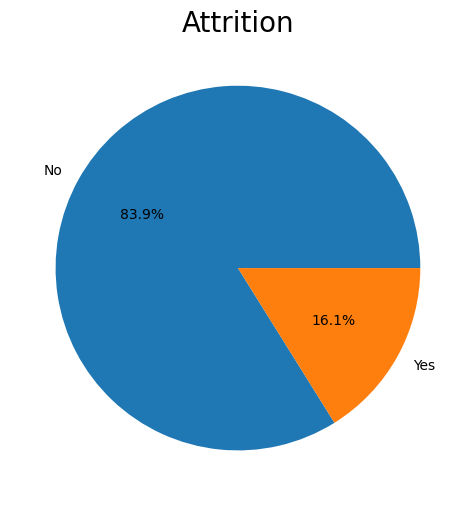

In [10]:
features = ['Attrition']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')
    plt.title('Attrition',fontsize=20)

plt.show()


#### The df.value_counts() method counts the number of types of values a particular column contains. 

In [9]:
df.shape

(1470, 35)

#### The df.shape method shows the shape of the dataset. 

We can identify that out of the 1470 employees, 1233 are labeled as 0 and 237 as 1.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### The df.info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 

In [9]:
df.iloc[1]

Age                                             49
Attrition                                       No
BusinessTravel                   Travel_Frequently
DailyRate                                      279
Department                  Research & Development
DistanceFromHome                                 8
Education                                        1
EducationField                       Life Sciences
EmployeeCount                                    1
EmployeeNumber                                   2
EnvironmentSatisfaction                          3
Gender                                        Male
HourlyRate                                      61
JobInvolvement                                   2
JobLevel                                         2
JobRole                         Research Scientist
JobSatisfaction                                  2
MaritalStatus                              Married
MonthlyIncome                                 5130
MonthlyRate                    

####  df.iloc[ ] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. The iloc property gets, or sets, the value(s) of the specified indexes.

### Data Type Check for every column

**Why data type check is required?**

Data type check helps us with understanding what type of variables our dataset contains. It helps us with identifying whether to keep that variable or not. If the dataset contains contiguous data, then only float and integer type variables will be beneficial and if we have to classify any value then categorical variables will be beneficial.

In [10]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)

In [11]:
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of categorical columns are  9
There names are as follows:  ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [12]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [13]:
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)

Total number of numerical columns are  26
There names are as follows:  ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


## Step 2 Insights: -

1) We have total 35 features where 26 of them are integer type and 9 are object type.

After this step we have to calculate various evaluation parameters which will help us in cleaning and analysing the data more accurately.

# Step 3: Descriptive Analysis

**Goal/Purpose:**  Finding the data distribution of the features. Visualization helps to understand data and also to explain the data to another person.

Things we are going to do in this step:

1. Mean
2. Median
3. Mode
4. Standard Deviation
5. Variance
6. Null Values
7. NaN Values
8. Min value
9. Max value
10. Count Value
11. Quatilers
12. Correlation
13. Skewness

In [14]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### The df.describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. 

# Measure the variability of data of the dataset

Variability describes how far apart data points lie from each other and from the center of a distribution.

# 1. Standard Deviation

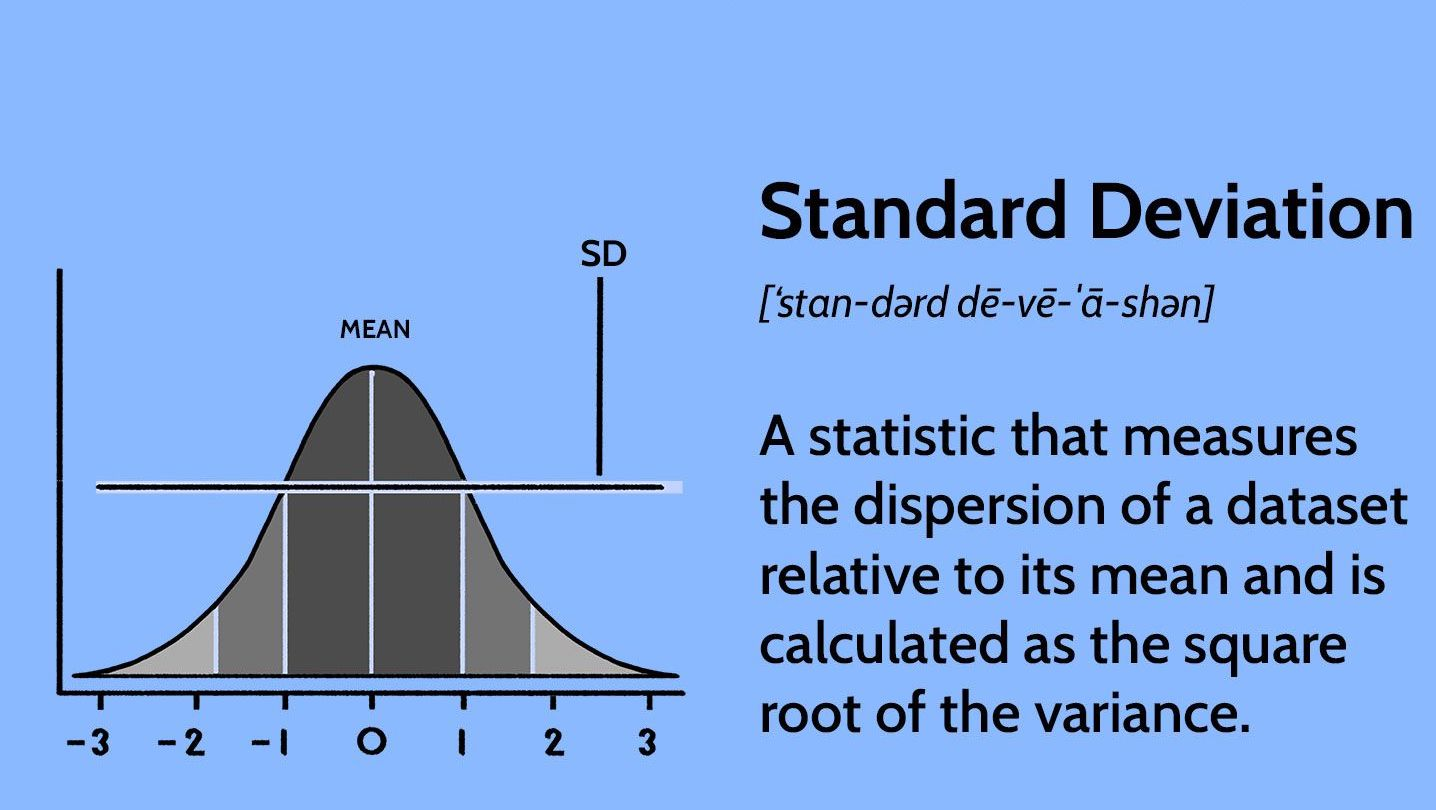

The standard deviation is the average amount of variability in your dataset.

It tells you, on average, how far each data point lies from the mean. The larger the standard deviation, the more variable the data set is and if zero variance then there is no variability in the dataset that means there no use of that dataset.


So, it helps in understanding the measurements when the data is distributed. The more the data is distributed, the greater will be the standard deviation of that data.Here, you as an individual can determine which company is beneficial in long term. But, if you didn't know the SD you would have choosen a wrong compnay for you.

In [15]:
df.std()

Age                            9.135373
DailyRate                    403.509100
DistanceFromHome               8.106864
Education                      1.024165
EmployeeCount                  0.000000
EmployeeNumber               602.024335
EnvironmentSatisfaction        1.093082
HourlyRate                    20.329428
JobInvolvement                 0.711561
JobLevel                       1.106940
JobSatisfaction                1.102846
MonthlyIncome               4707.956783
MonthlyRate                 7117.786044
NumCompaniesWorked             2.498009
PercentSalaryHike              3.659938
PerformanceRating              0.360824
RelationshipSatisfaction       1.081209
StandardHours                  0.000000
StockOptionLevel               0.852077
TotalWorkingYears              7.780782
TrainingTimesLastYear          1.289271
WorkLifeBalance                0.706476
YearsAtCompany                 6.126525
YearsInCurrentRole             3.623137
YearsSinceLastPromotion        3.222430


#### We can also understand the standard deviation using the below function. 

In [16]:
def std_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].std(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    std_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return std_total_df

In [17]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)
std_cal(df,int64_lst)

,normal_value,zero_value
0,24,2


zero_value -> is the zero variance and when then there is no variability in the dataset that means there no use of that dataset.



# 2. Variance

The variance is the average of squared deviations from the mean. A deviation from the mean is how far a score lies from the mean.

Variance is the square of the standard deviation. This means that the units of variance are much larger than those of a typical value of a data set.

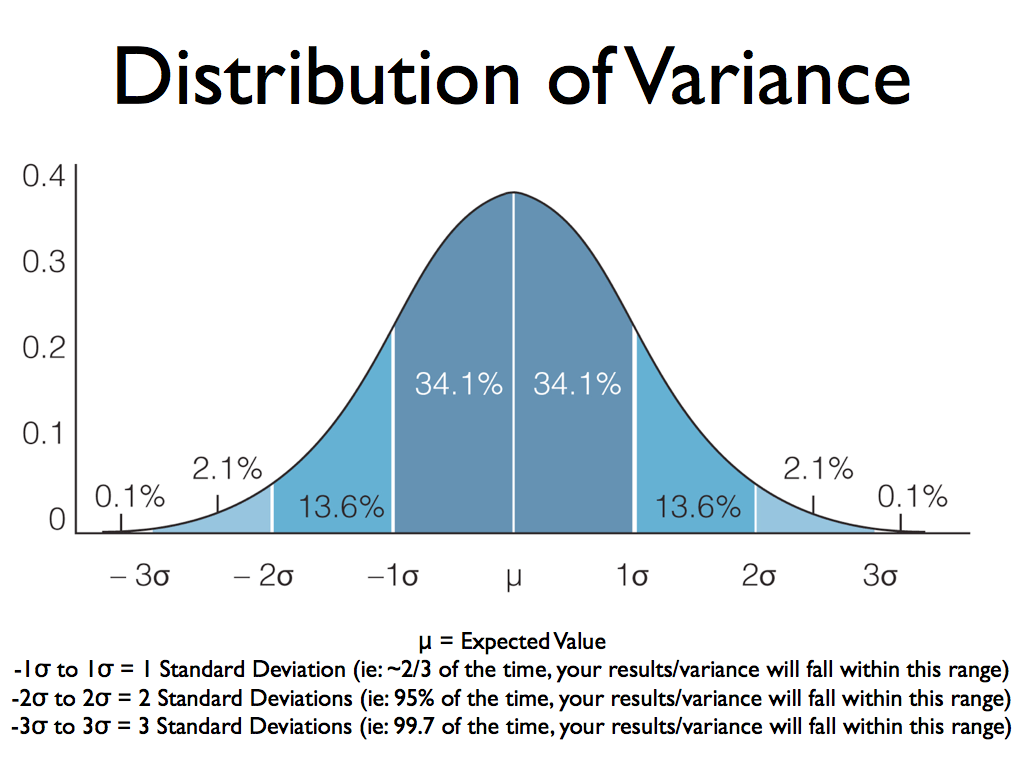

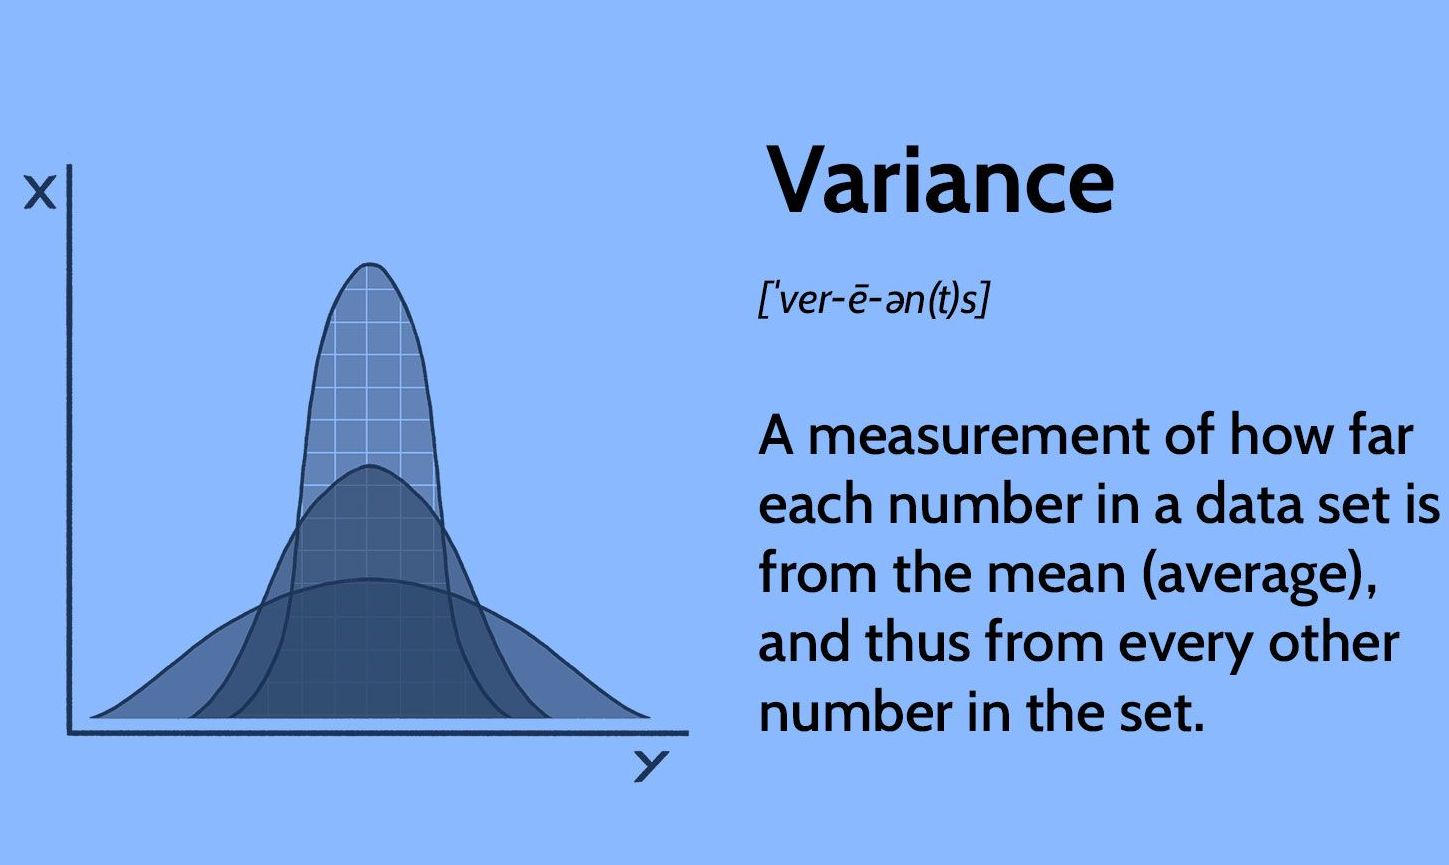

#### Why do we used Variance ?

By Squairng the number we get non-negative computation i.e. Disperson cannot be negative.
The presence of variance is very important in your dataset because this will allow the model to learn about the different patterns hidden in the data

In [18]:
df.var()

Age                         8.345505e+01
DailyRate                   1.628196e+05
DistanceFromHome            6.572125e+01
Education                   1.048914e+00
EmployeeCount               0.000000e+00
EmployeeNumber              3.624333e+05
EnvironmentSatisfaction     1.194829e+00
HourlyRate                  4.132856e+02
JobInvolvement              5.063193e-01
JobLevel                    1.225316e+00
JobSatisfaction             1.216270e+00
MonthlyIncome               2.216486e+07
MonthlyRate                 5.066288e+07
NumCompaniesWorked          6.240049e+00
PercentSalaryHike           1.339514e+01
PerformanceRating           1.301936e-01
RelationshipSatisfaction    1.169013e+00
StandardHours               0.000000e+00
StockOptionLevel            7.260346e-01
TotalWorkingYears           6.054056e+01
TrainingTimesLastYear       1.662219e+00
WorkLifeBalance             4.991081e-01
YearsAtCompany              3.753431e+01
YearsInCurrentRole          1.312712e+01
YearsSinceLastPr

#### We can also understand the Variance using the below function.

In [19]:
zero_cols = []

def var_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].var(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
            zero_cols.append(value)
    
    var_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return var_total_df

In [20]:
var_cal(df, int64_lst)

,normal_value,zero_value
0,24,2


zero_value -> Zero variance means that there is no difference in the data values, which means that they are all the same.

# Measure central tendency

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. They are also classed as summary statistics.



Mean - The average value. Median - The mid point value. Mode - The most common value.

# 1. Mean

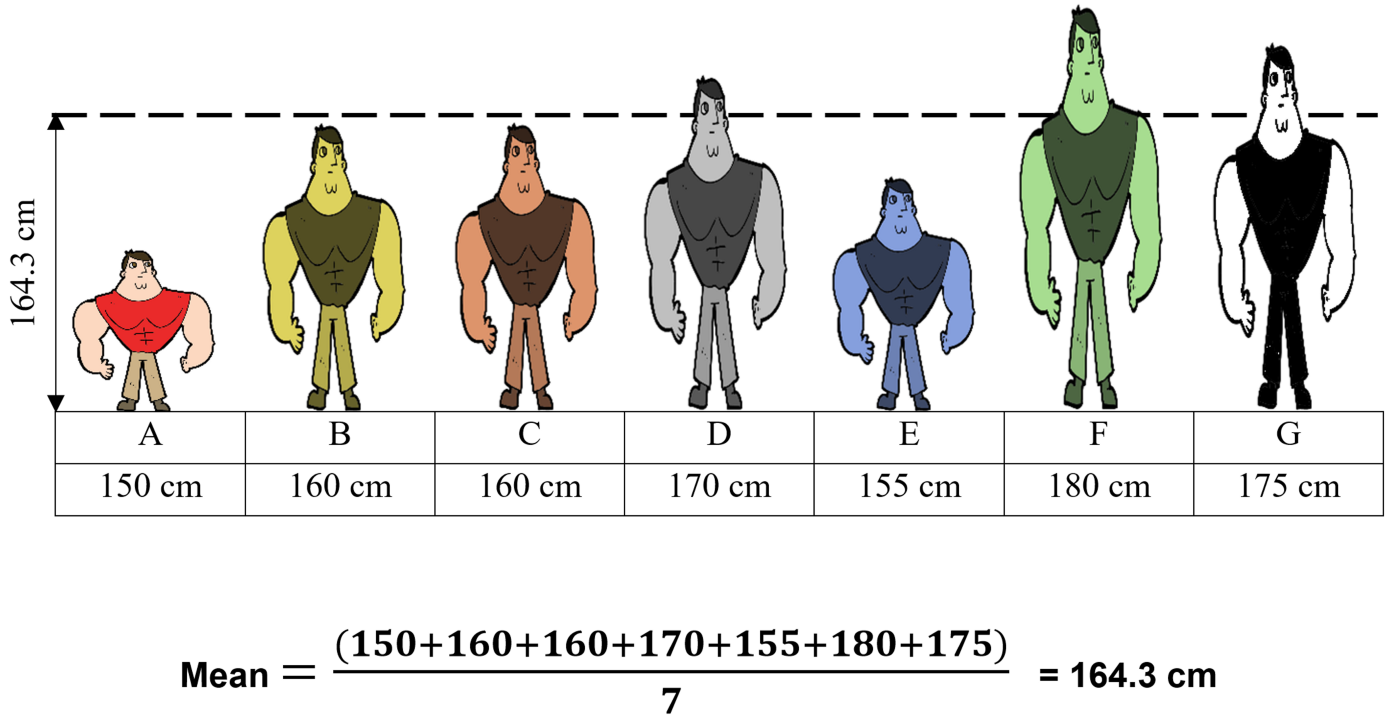

The mean is the arithmetic average, and it is probably the measure of central tendency that you are most familiar.

#### Why do we calculate mean?




The mean is used to summarize a data set. It is a measure of the center of a data set.


In [69]:
df.mean()

Age                            36.923810
DailyRate                     802.485714
DistanceFromHome                9.192517
Education                       2.912925
EmployeeCount                   1.000000
EmployeeNumber               1024.865306
EnvironmentSatisfaction         2.721769
HourlyRate                     65.891156
JobInvolvement                  2.729932
JobLevel                        2.063946
JobSatisfaction                 2.728571
MonthlyIncome                6502.931293
MonthlyRate                 14313.103401
NumCompaniesWorked              2.693197
PercentSalaryHike              15.209524
PerformanceRating               3.153741
RelationshipSatisfaction        2.712245
StandardHours                  80.000000
StockOptionLevel                0.793878
TotalWorkingYears              11.279592
TrainingTimesLastYear           2.799320
WorkLifeBalance                 2.761224
YearsAtCompany                  7.008163
YearsInCurrentRole              4.229252
YearsSinceLastPr

#### We can also understand the mean using the below function. 

In [70]:
def mean_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    mean_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return mean_total_df

In [71]:
mean_cal(df, int64_lst)

,normal_value,zero_value
0,26,0


zero_value -> that the mean of a paticular column is zero, which isn't usefull in anyway and need to be drop.

# 2.Median
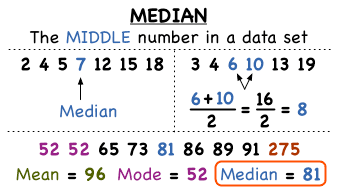

The median is the middle value. It is the value that splits the dataset in half.The median of a dataset is the value that, assuming the dataset is ordered from smallest to largest, falls in the middle. If there are an even number of values in a dataset, the middle two values are the median.

#### Why do we calculate median ?

By comparing the median to the mean, you can get an idea of the distribution of a dataset. When the mean and the median are the same, the dataset is more or less evenly distributed from the lowest to highest values.

In [21]:
df.median()

Age                            36.0
DailyRate                     802.0
DistanceFromHome                7.0
Education                       3.0
EmployeeCount                   1.0
EmployeeNumber               1020.5
EnvironmentSatisfaction         3.0
HourlyRate                     66.0
JobInvolvement                  3.0
JobLevel                        2.0
JobSatisfaction                 3.0
MonthlyIncome                4919.0
MonthlyRate                 14235.5
NumCompaniesWorked              2.0
PercentSalaryHike              14.0
PerformanceRating               3.0
RelationshipSatisfaction        3.0
StandardHours                  80.0
StockOptionLevel                1.0
TotalWorkingYears              10.0
TrainingTimesLastYear           3.0
WorkLifeBalance                 3.0
YearsAtCompany                  5.0
YearsInCurrentRole              3.0
YearsSinceLastPromotion         1.0
YearsWithCurrManager            3.0
dtype: float64

####  We can also understand the median using the below function. 

In [22]:
def median_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    median_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return median_total_df

In [23]:
median_cal(df, int64_lst)

,normal_value,zero_value
0,26,0


zero_value -> that the median of a paticular column is zero which isn't usefull in anyway and need to be drop.

# 3. Mode
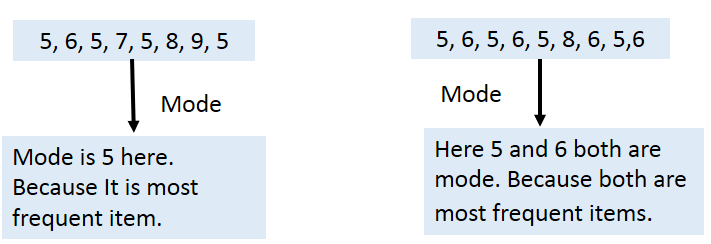
The mode is the value that occurs the most frequently in your data set. On a bar chart, the mode is the highest bar. If the data have multiple values that are tied for occurring the most frequently, you have a multimodal distribution. If no value repeats, the data do not have a mode.

#### Why do we calculate mode ?

The mode can be used to summarize categorical variables, while the mean and median can be calculated only for numeric variables. This is the main advantage of the mode as a measure of central tendency. It's also useful for discrete variables and for continuous variables when they are expressed as intervals.

In [24]:
df.mode()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,35.0,No,Travel_Rarely,691.0,Research & Development,2.0,3.0,Life Sciences,1.0,1,...,3.0,80.0,0.0,10.0,2.0,3.0,5.0,2.0,0.0,2.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2062,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2065,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
def mode_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value', 'string_value']
    zero_value = 0
    normal_value = 0
    string_value = 0
    
    for value in int64_lst:
                
        rs = df[value].mode()[0]
        
        if isinstance(rs, str):
            string_value = string_value + 1
        else:

            if rs > 0:
                normal_value = normal_value + 1

            elif rs == 0:
                zero_value = zero_value + 1
    
    mode_total_df =  pd.DataFrame([[normal_value, zero_value, string_value]], columns=cols) 
    
    return mode_total_df

In [26]:
mode_cal(df, list(df.columns))

,normal_value,zero_value,string_value
0,24,2,9


zero_value -> that the mode of a paticular column is zero which isn't usefull in anyway and need to be drop.

# Null and Nan values

1. **Null Values**


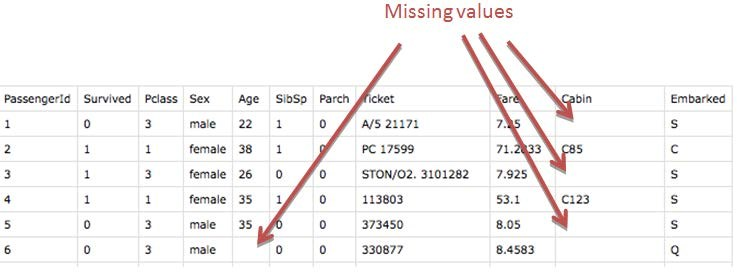

A null value in a relational database is used when the value in a column is unknown or missing. A null is neither an empty string (for character or datetime data types) nor a zero value (for numeric data types).

In [78]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

As we notice that there are no null values in our dataset.

2. **Nan Values**

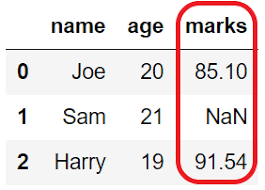

NaN, standing for Not a Number, is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable, especially in floating-point arithmetic.

In [79]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

As we notice that there are no nan values in our dataset.

#### Another way to remove null and nan values is to use the method "df.dropna(inplace=True)". 

# Count of unique occurences of every value in all categorical value



In [80]:
for value in objects_lst:
    
    print(f"{value:{10}} {df[value].value_counts()}")

Attrition  No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender     Male      882
Female    588
Name: Gender, dtype: int64
JobRole    Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
MaritalStatus Married     673
Single      470
Divorced    327
Name: MaritalStat

- Categorical data are variables that contain label values rather than numeric values.The number of possible values is often limited to a fixed set.
- Use Label Encoder to label the categorical data. Label Encoder is the part of SciKit Learn library in Python and used to convert categorical data, or text data, into numbers, which our predictive models can better understand.



__Label Encoding__ refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [82]:
#Before Encoding
for i in objects_lst:
    print(i)
    print()
    print(df[i])
    print("-------------------------------------------------")
    print()

Attrition

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object
-------------------------------------------------

BusinessTravel

0           Travel_Rarely
1       Travel_Frequently
2           Travel_Rarely
3       Travel_Frequently
4           Travel_Rarely
              ...        
1465    Travel_Frequently
1466        Travel_Rarely
1467        Travel_Rarely
1468    Travel_Frequently
1469        Travel_Rarely
Name: BusinessTravel, Length: 1470, dtype: object
-------------------------------------------------

Department

0                        Sales
1       Research & Development
2       Research & Development
3       Research & Development
4       Research & Development
                 ...          
1465    Research & Development
1466    Research & Development
1467    Research & Development
1468                     Sales
1469    Research & Development
Name:

In [83]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in objects_lst:
    df[i] = le.fit_transform(df[i])

In [84]:
#After encoding or converting categorical col values into numbers
for i in objects_lst:
    print(i)
    print()
    print(df[i])
    print("-------------------------------------------------")
    print()

Attrition

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32
-------------------------------------------------

BusinessTravel

0       2
1       1
2       2
3       1
4       2
       ..
1465    1
1466    2
1467    2
1468    1
1469    2
Name: BusinessTravel, Length: 1470, dtype: int32
-------------------------------------------------

Department

0       2
1       1
2       1
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    2
1469    1
Name: Department, Length: 1470, dtype: int32
-------------------------------------------------

EducationField

0       1
1       1
2       4
3       1
4       3
       ..
1465    3
1466    3
1467    1
1468    3
1469    3
Name: EducationField, Length: 1470, dtype: int32
-------------------------------------------------

Gender

0       0
1       1
2       1
3       0
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469  

1 ~ Yes,
0 ~ No

# Skewness 

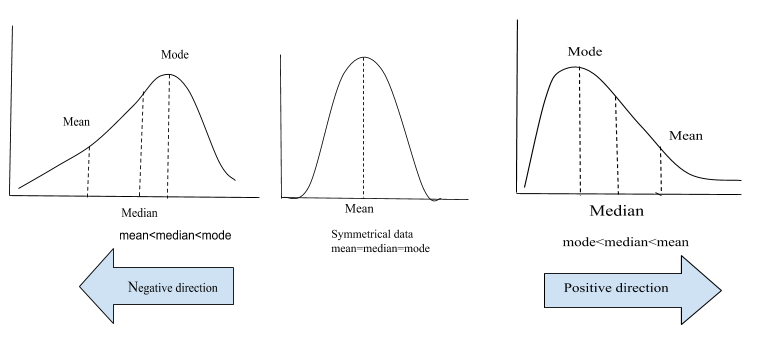

Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness

#### Why do we calculate Skewness ?

Skewness gives the direction of the outliers if it is right-skewed, most of the outliers are present on the right side of the distribution while if it is left-skewed, most of the outliers will present on the left side of the distribution

#### Below is the function to calculate skewness. 

In [85]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in int64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [86]:
int64_cols = ['int64','int32']
int64_lst_col = list(df.select_dtypes(include=int64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, int64_lst_col)

In [87]:
skew_df

,column,skewness_value,skewness (+ve or -ve)
0,Age,0.4133,positive (+ve) skewed
1,Attrition,1.8444,positive (+ve) skewed
2,BusinessTravel,-1.4390,negative (-ve) skewed
3,DailyRate,-0.0035,negative (-ve) skewed
4,Department,0.1722,positive (+ve) skewed
5,DistanceFromHome,0.9581,positive (+ve) skewed
6,Education,-0.2897,negative (-ve) skewed
7,EducationField,0.5504,positive (+ve) skewed
8,EmployeeCount,0.0000,normal distrbution
9,EmployeeNumber,0.0166,positive (+ve) skewed


In [88]:
skew_total_df

,positive (+ve) skewed,normal distrbution,negative (-ve) skewed
0,20,3,12


We notice with the above results that we have following details:
1. 20 columns are positive skewed
2. 12 columns are negative skewed
3. 3 columns are normal skewed

### Step 3 Insights: - 

With the statistical analysis we have found that the data have a lot of skewness in them all the columns are positively skewed with mostly zero variance.

Statistical analysis is little difficult to understand at one glance so to make it more understandable we will perform visulatization on the data which will help us to understand the process easily.

### Why we are calculating all these metrics? 

Mean / Median /Mode/ Variance /Standard Deviation are all very basic but very important concept of statistics used in data science. Almost all the machine learning algorithm uses these concepts in data preprocessing steps. These concepts are part of descriptive statistics where we basically used to describe and understand the data for features in Machine learning

# Need of Employee Attrition prediction: -

- **Managing workforce:** If the supervisors or HR came to know about some employees that they will be planning to leave the company then they could get in touch with those employees which can help them to stay back or they can manage the workforce by hiring the new alternative of those employees.

- **Smooth pipeline:** If all the employees in the current project are working continuously on a project then the pipeline of that project will be smooth but if suppose one efficient asset of the project(employee) suddenly leave that company then the workflow will be not so smooth.

- **Hiring Management:** If HR of one particular project came to know about the employee who is willing to leave the company then he/she can manage the number of hiring and they can get the valuable asset whenever they need so for the efficient flow of work.

# Step 4: Data Exploration
**Goal/Purpose:**

Graphs we are going to develop in this step

1. Histogram of all columns to check the distrubution of the columns
2. Distplot or distribution plot of all columns to check the variation in the data distribution
3. Heatmap to calculate correlation within feature variables
4. Boxplot to find out outlier in the feature columns

# 1. Histogram

A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis.The vertical y-axis represents the number count or percentage of occurrences in the data for each column

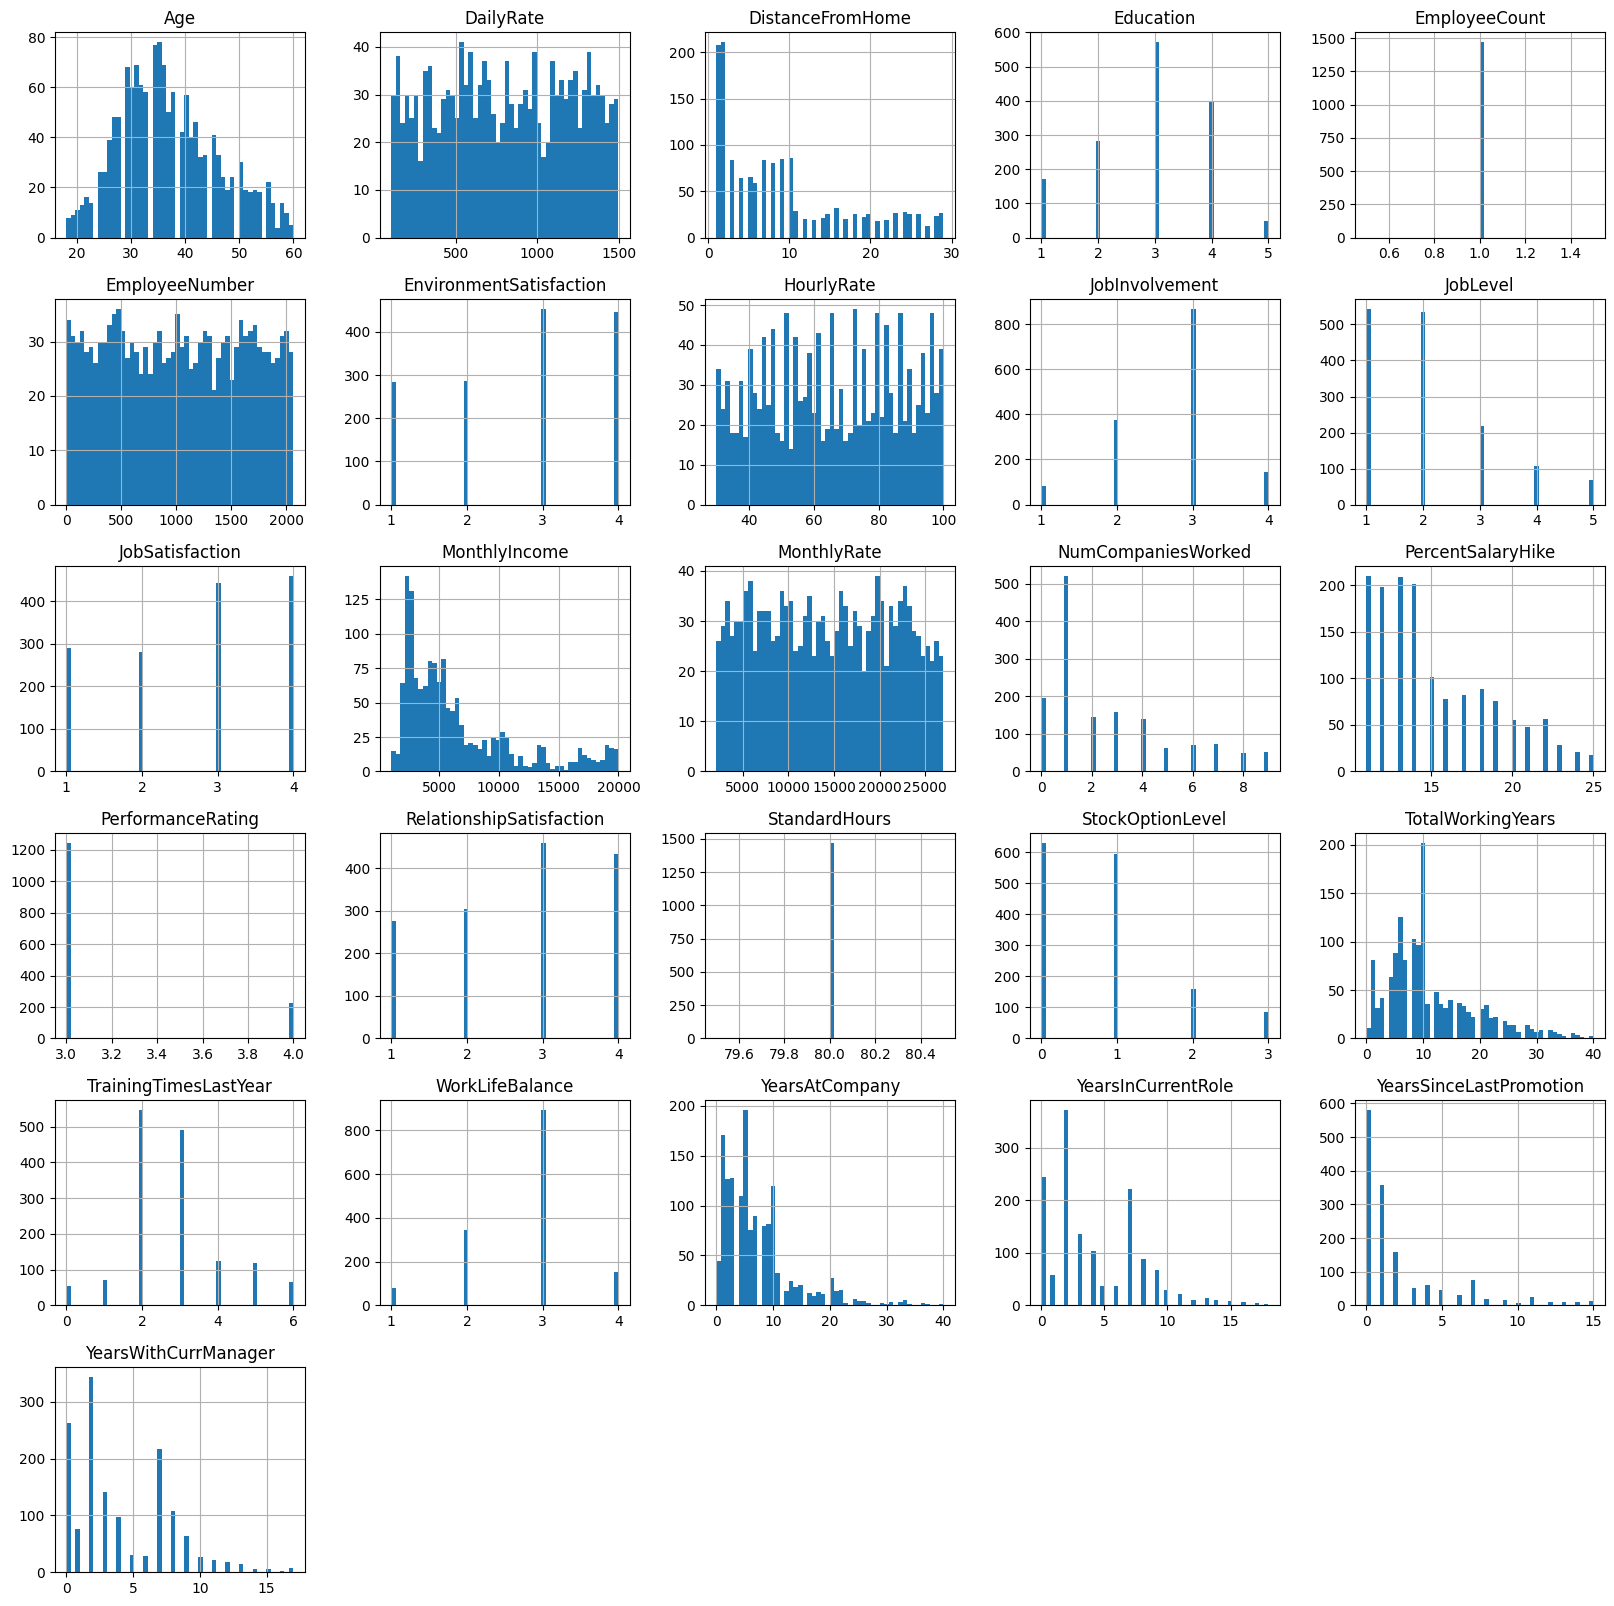

In [31]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,20))
plt.show()


### Histogram Insight: -

Histogram helps in identifying the following:
- View the shape of your data set’s distribution to look for outliers or other significant data points.

- Determine whether something significant has boccurred from one time period to another.

### Why Histogram? 

It is used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

From the above graphical representation we can identify that the highest bar represents the outliers which is above the maximum range.

We can also identify that the values are moving on the right side, which determines positive and the centered values determines normal skewness.

# 2. Distplot

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it 

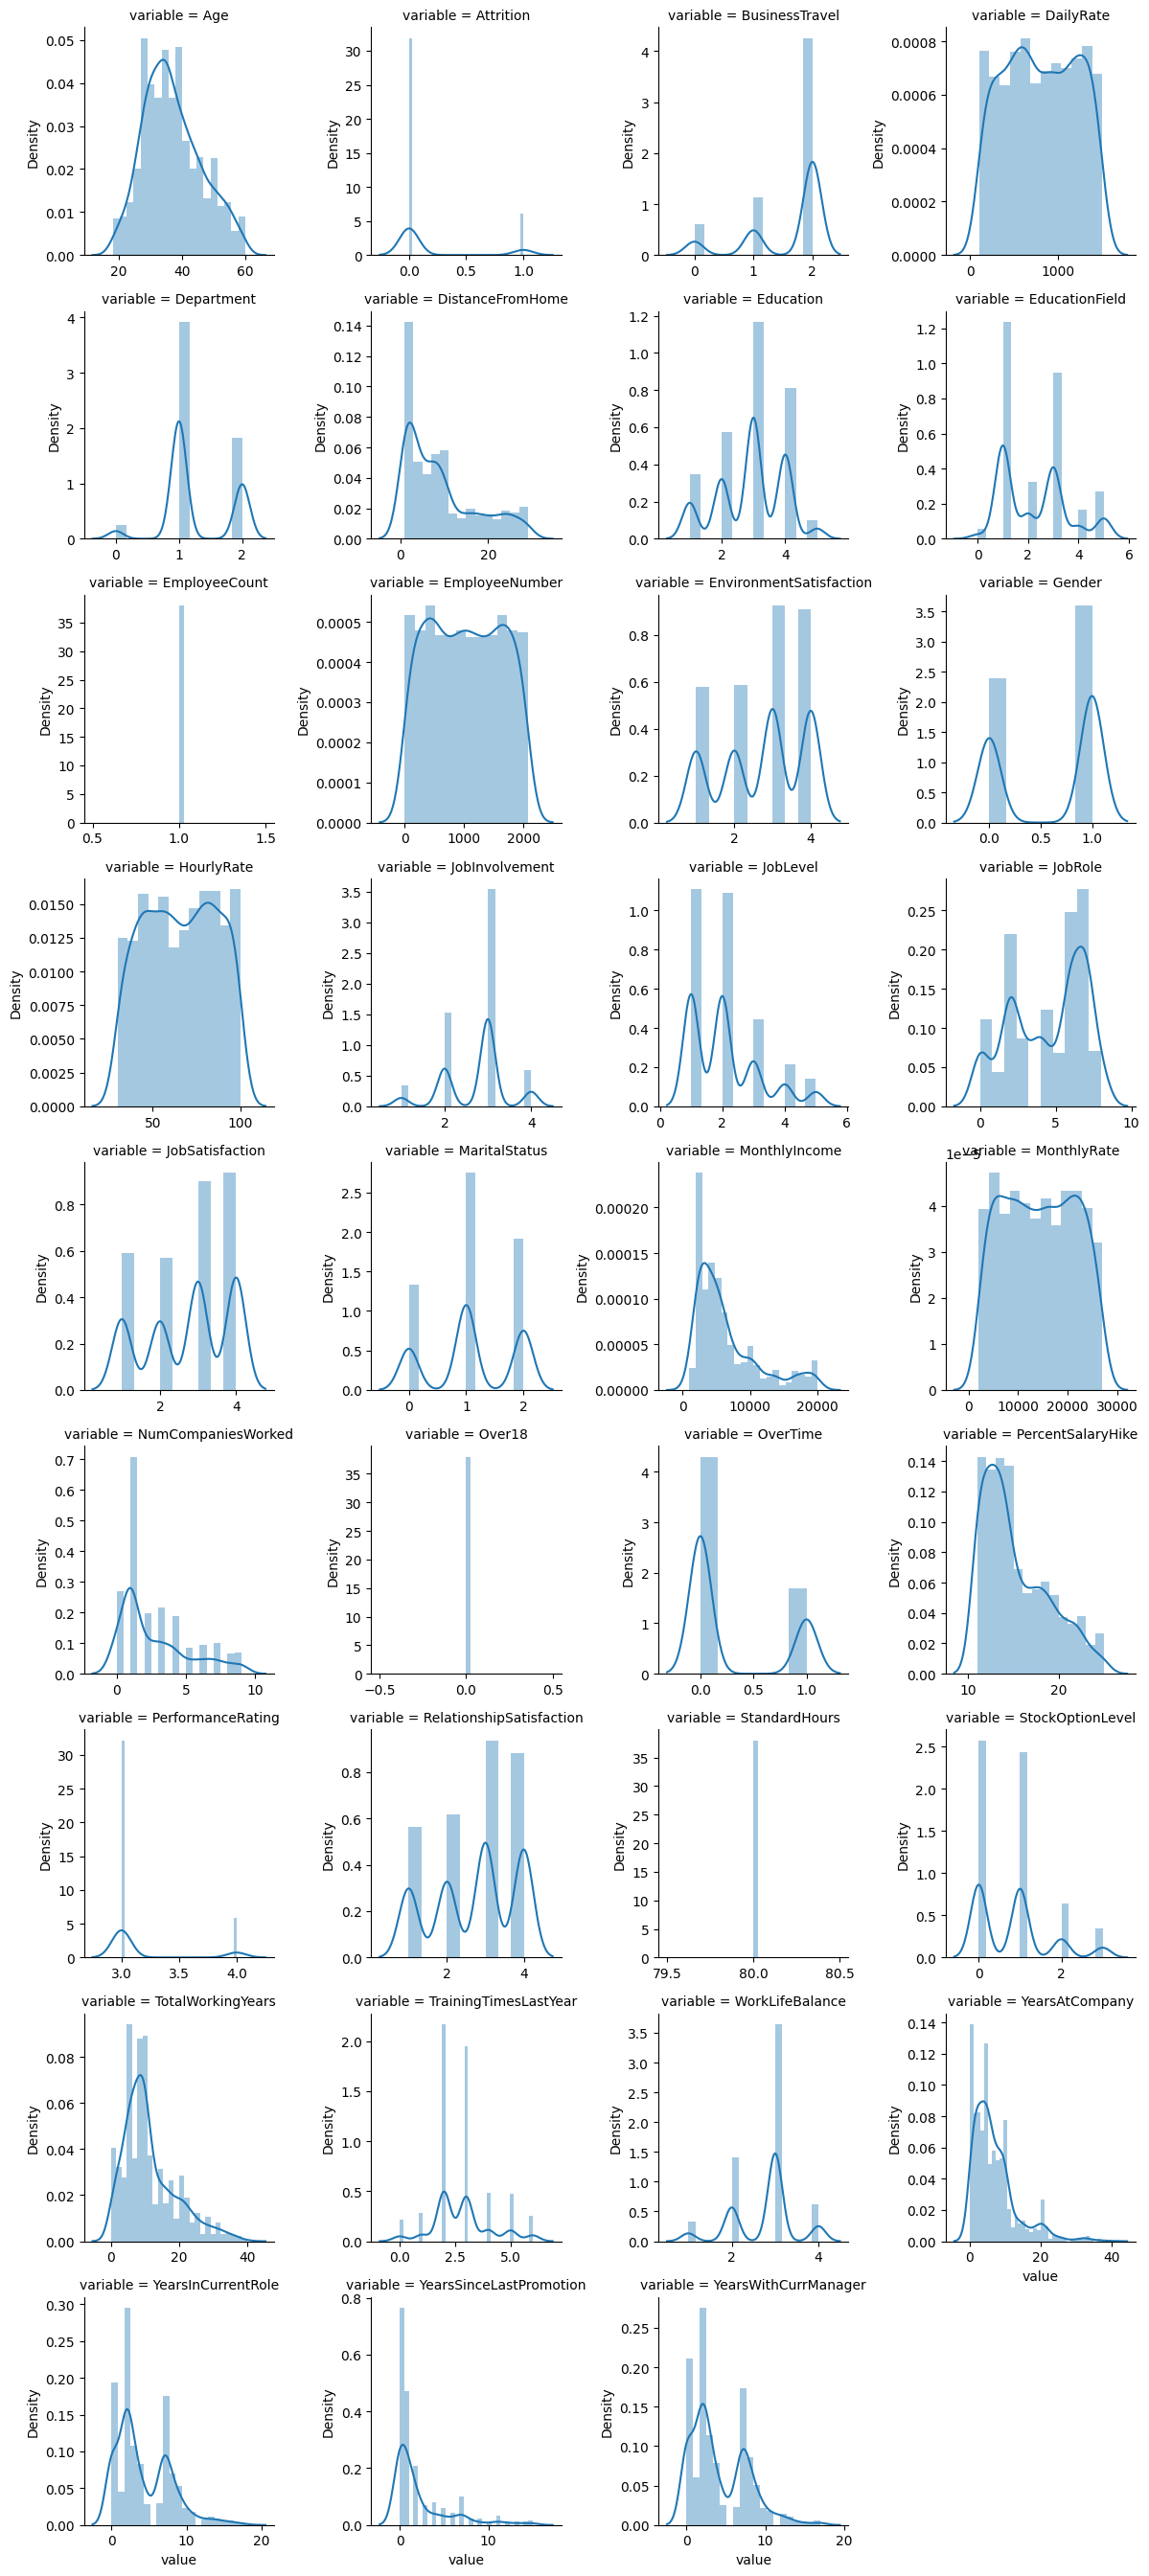

In [94]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

### Distplot Insights: -

Above is the distrution bar graphs to confirm about the statistics of the data about the skewness, the above results are:
1. 20 columns are positive skewed, 12 columns are negative skewed and 3 columns are normal skewed.
2. 1 column is added here i.e Attrition which is our target variable ~ which is also +ve skewed. In that case we'll need to log transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables

### Why Distplot?
Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve. If the bell curve is shifted to the left or the right, it is said to be skewed.

We can observe that the bell curve is shifted to left we indicates positive skewness.As all the column are positively skewed we don't need to do scaling.

Let's proceed and check the distribution of the target variable.


In [97]:
#+ve skewed 
df['Attrition'].skew()

1.8443661240010911

#### The target variable is positively skewed.A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. 

# 3. Heatmap




A heatmap (or heat map) is a graphical representation of data where values are depicted by color.Heatmaps make it easy to visualize complex data and understand it at a glance 

__Correlation__ - A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.

Correlation can have a value:

- 1 is a perfect positive correlation
- 0 is no correlation (the values don't seem linked at all)
- -1 is a perfect negative correlation



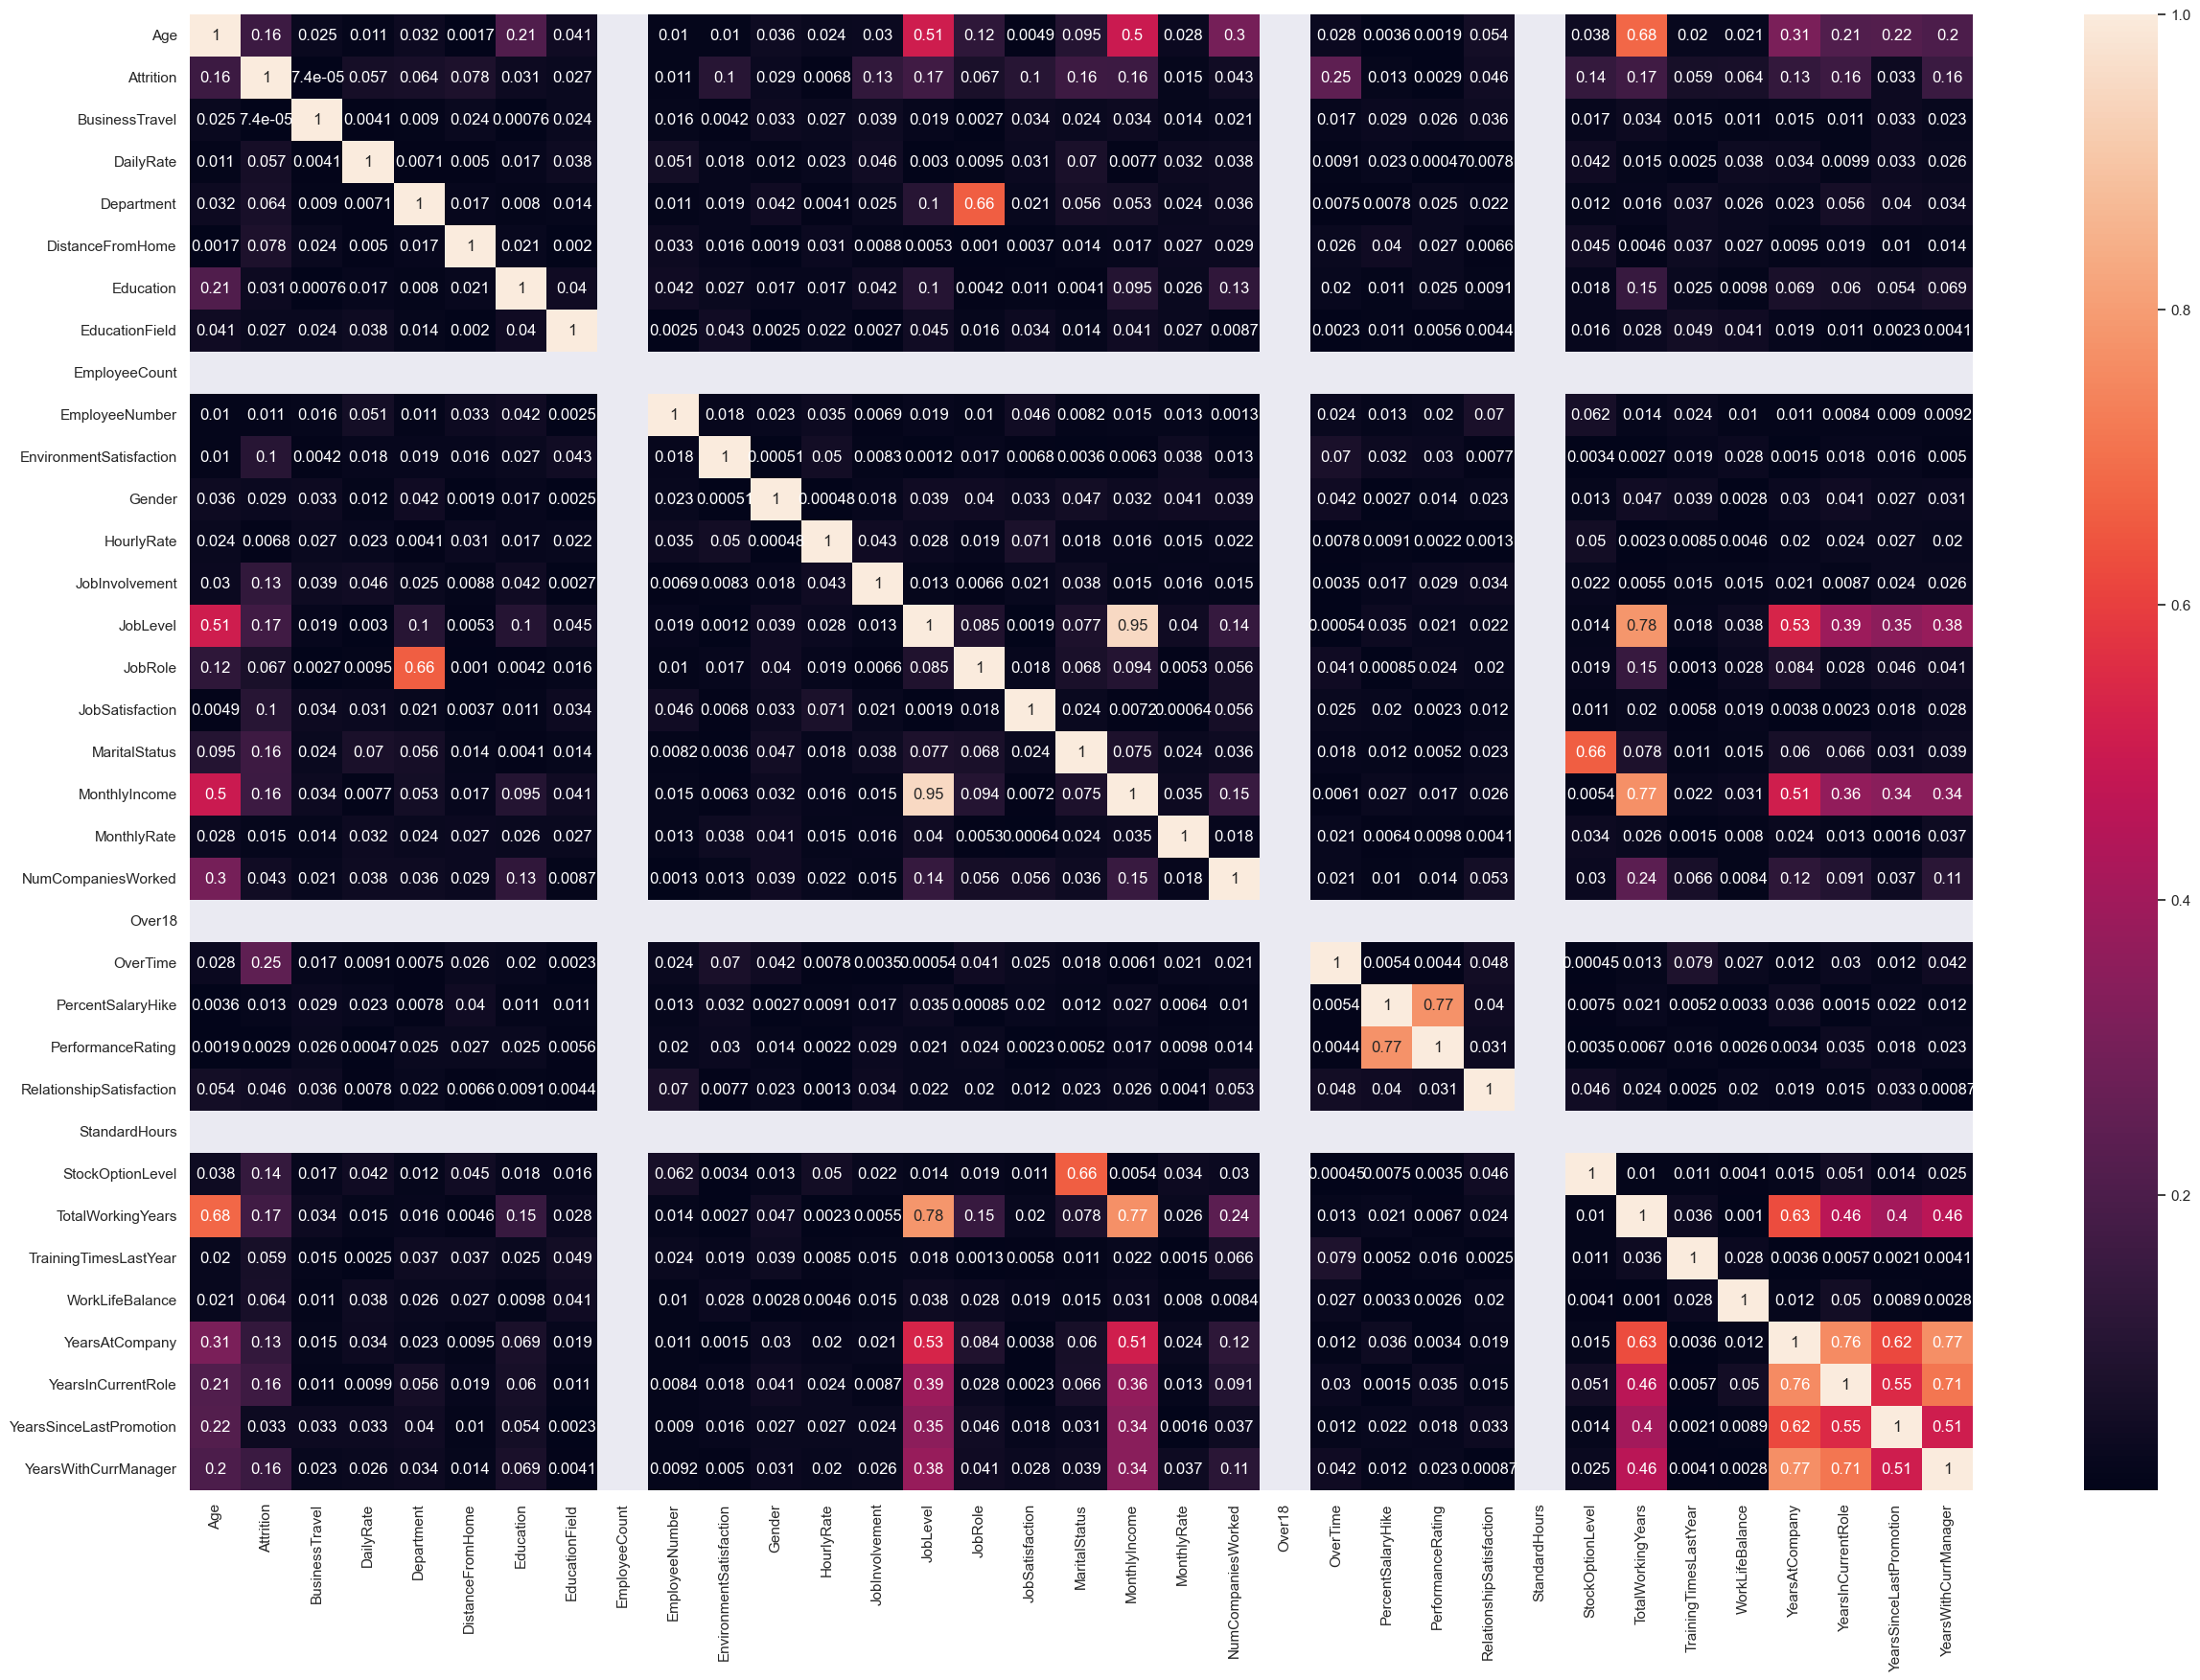

In [101]:
#correlation plot
sns.set(rc = {'figure.figsize':(30,20)})
corr = df.corr().abs()
sns.heatmap(corr,annot=True) 
plt.show()

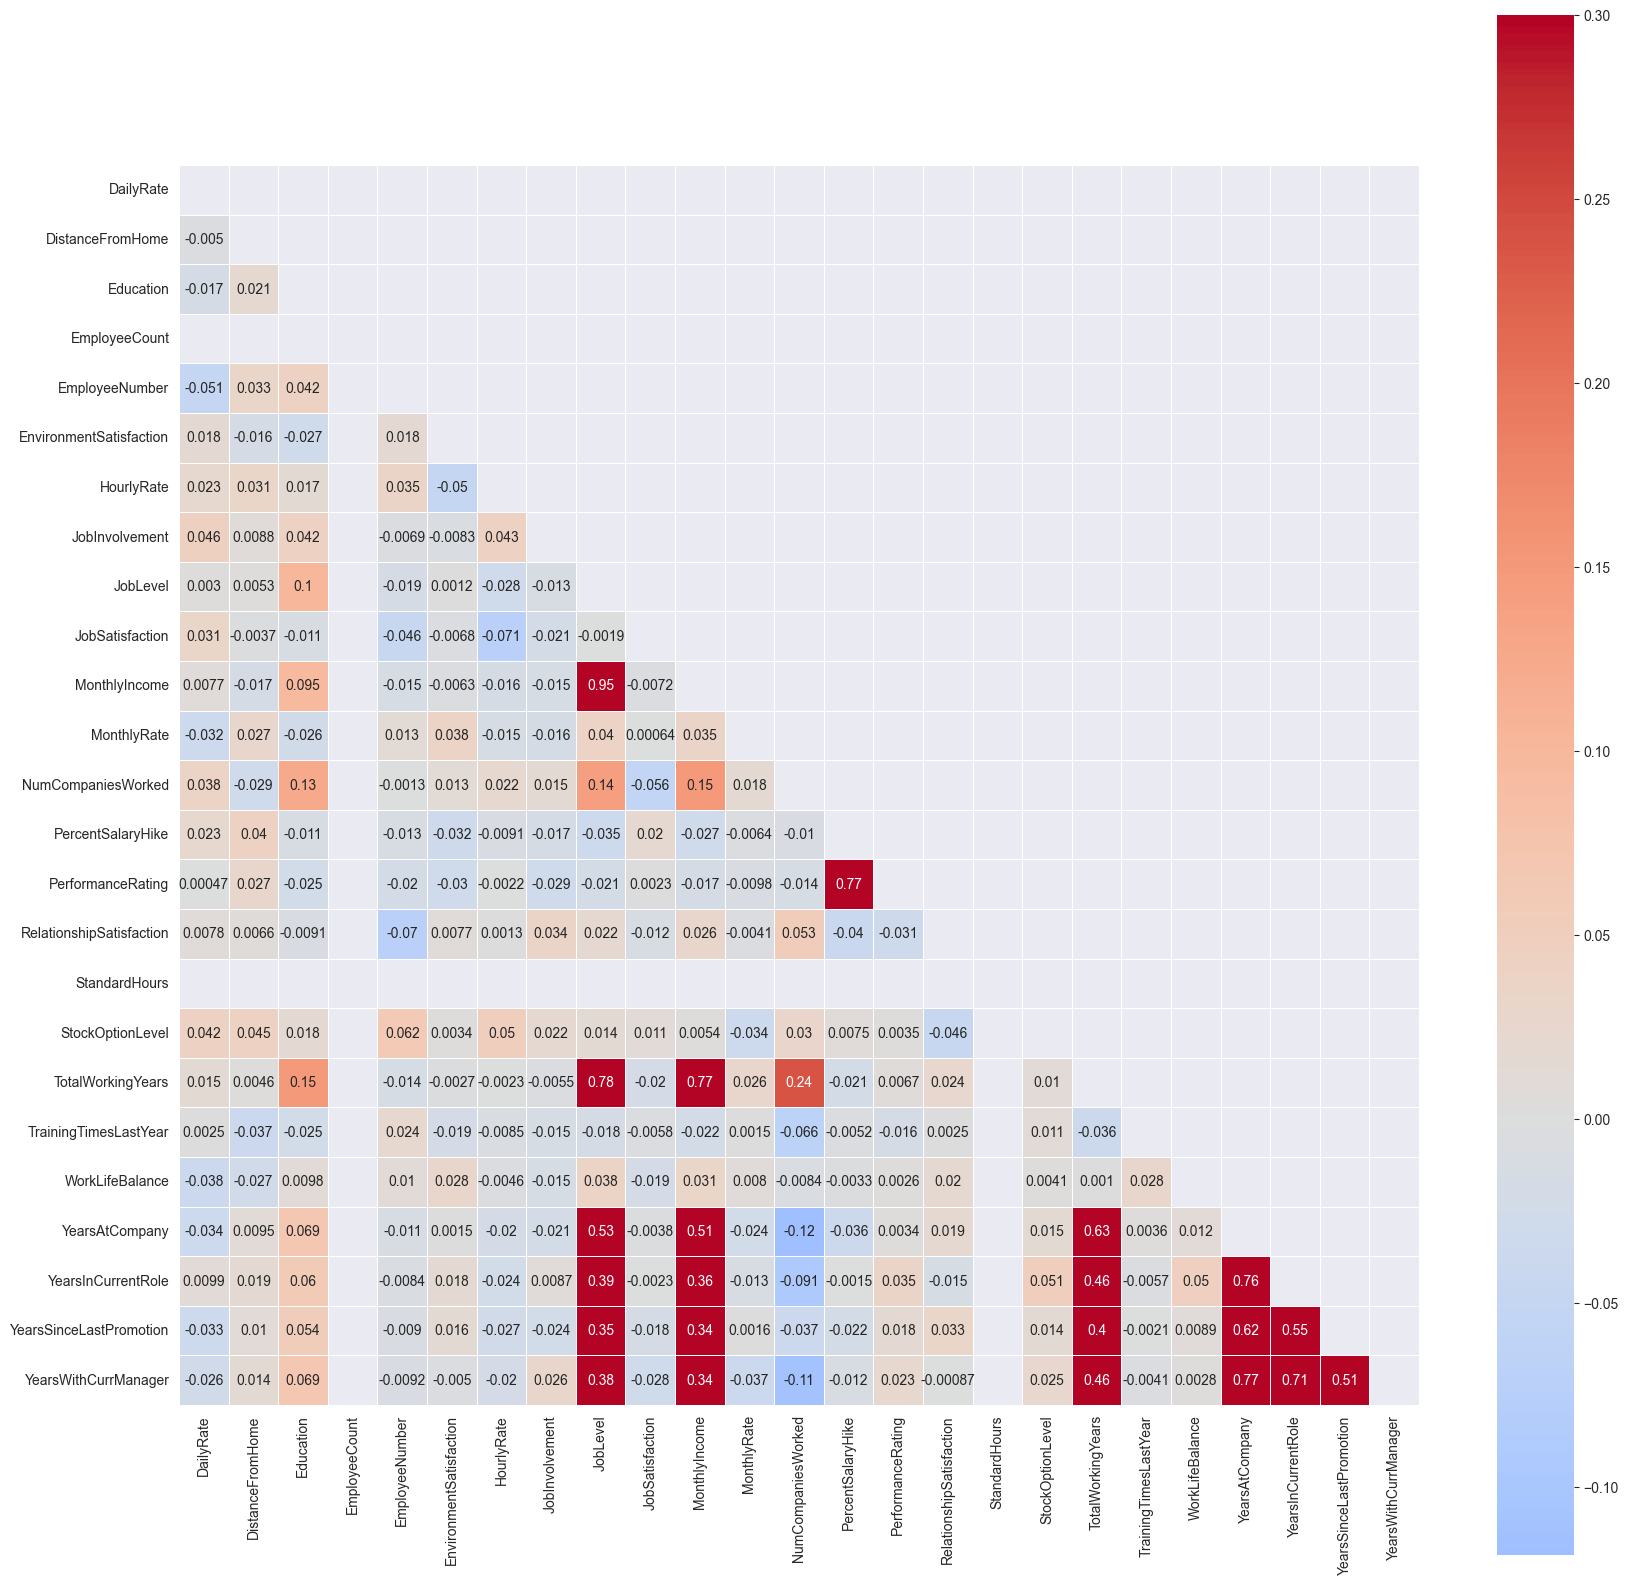

In [40]:
plt.figure(figsize=(20,20))
corr=df[df.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(df[df.columns[1:]].corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

### Notice the last column from right side of this map. We can see the correlation of all variables against Attrition. As you can see, some variables seem to be strongly correlated with the target variable. Here, a numeric correlation score will help us understand the graph better.

In [102]:
print (corr['Attrition'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('-------------------------------------')
print (corr['Attrition'].sort_values(ascending=False)[-5:]) #last 5 values
print ('-------------------------------------')

Attrition                  1.000000
OverTime                   0.246118
TotalWorkingYears          0.171063
JobLevel                   0.169105
MaritalStatus              0.162070
YearsInCurrentRole         0.160545
MonthlyIncome              0.159840
Age                        0.159205
YearsWithCurrManager       0.156199
StockOptionLevel           0.137145
YearsAtCompany             0.134392
JobInvolvement             0.130016
JobSatisfaction            0.103481
EnvironmentSatisfaction    0.103369
DistanceFromHome           0.077924
Name: Attrition, dtype: float64 

-------------------------------------
PerformanceRating    0.002889
BusinessTravel       0.000074
EmployeeCount             NaN
Over18                    NaN
StandardHours             NaN
Name: Attrition, dtype: float64
-------------------------------------


Here we see that the OverTime feature is 24% correlated with the target variable. 

In [103]:
corr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.159205,0.024751,0.010661,0.031882,0.001686,0.208034,0.040873,NaN,0.010145,...,0.053535,NaN,0.037510,0.680381,0.019621,0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,0.159205,1.000000,0.000074,0.056652,0.063991,0.077924,0.031373,0.026846,NaN,0.010577,...,0.045872,NaN,0.137145,0.171063,0.059478,0.063939,0.134392,0.160545,0.033019,0.156199
BusinessTravel,0.024751,0.000074,1.000000,0.004086,0.009044,0.024469,0.000757,0.023724,NaN,0.015578,...,0.035986,NaN,0.016727,0.034226,0.015240,0.011256,0.014575,0.011497,0.032591,0.022636
DailyRate,0.010661,0.056652,0.004086,1.000000,0.007109,0.004985,0.016806,0.037709,NaN,0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,0.037848,0.034055,0.009932,0.033229,0.026363
Department,0.031882,0.063991,0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,0.010895,...,0.022414,NaN,0.012193,0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,0.001686,0.077924,0.024469,0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,0.036942,0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,0.031373,0.000757,0.016806,0.007996,0.021042,1.000000,0.039592,NaN,0.042070,...,0.009118,NaN,0.018422,0.148280,0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,0.039592,1.000000,NaN,0.002516,...,0.004378,NaN,0.016185,0.027848,0.049195,0.041191,0.018692,0.010506,0.002326,0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,0.010145,0.010577,0.015578,0.050990,0.010895,0.032916,0.042070,0.002516,NaN,1.000000,...,0.069861,NaN,0.062227,0.014365,0.023603,0.010309,0.011240,0.008416,0.009019,0.009197


### Heatmap insights: -

As we know, it is recommended to avoid correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, hence increasing the risk of errors.




### Why Heatmap?

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.

# 4. Boxplot

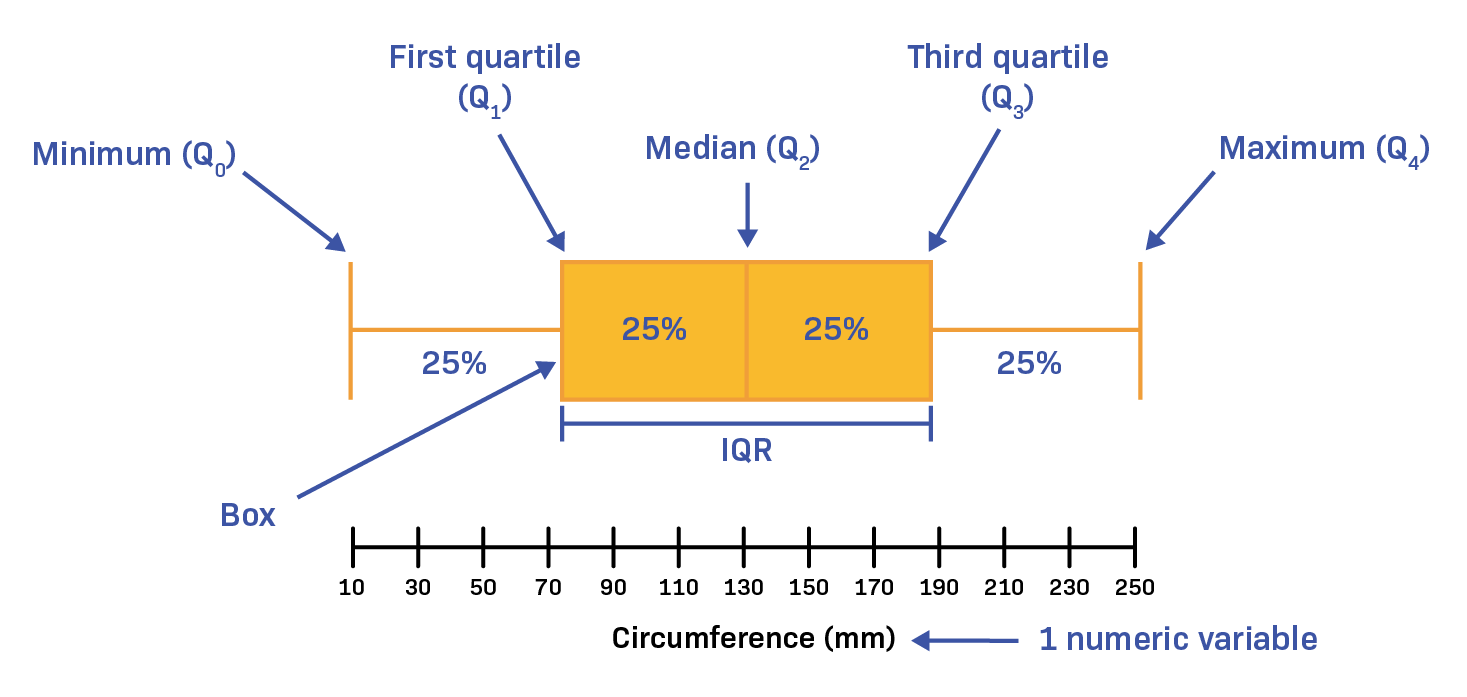

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”).

Basically, to find the outlier in a dataset/column.

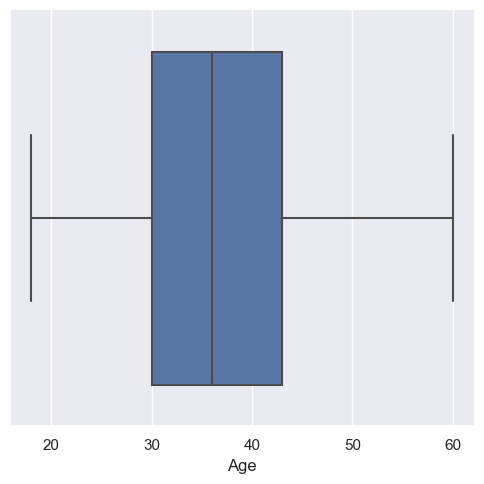

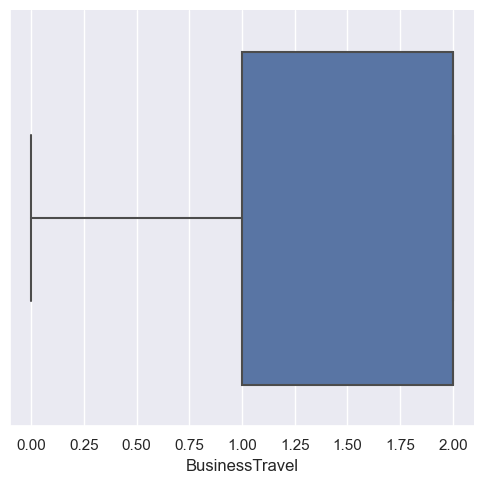

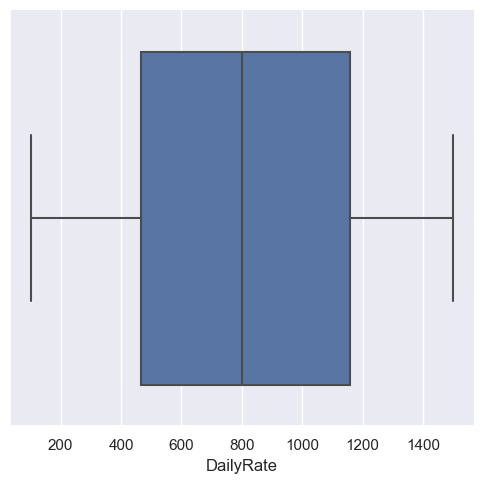

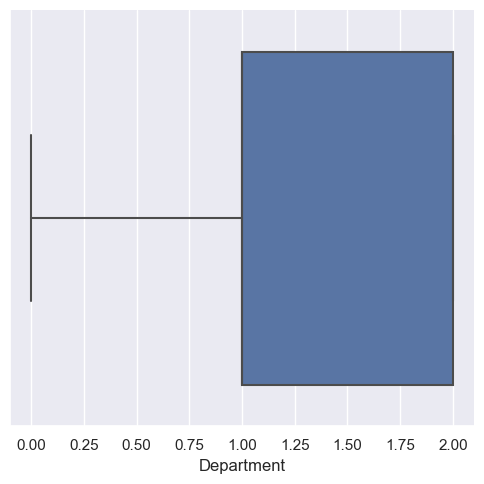

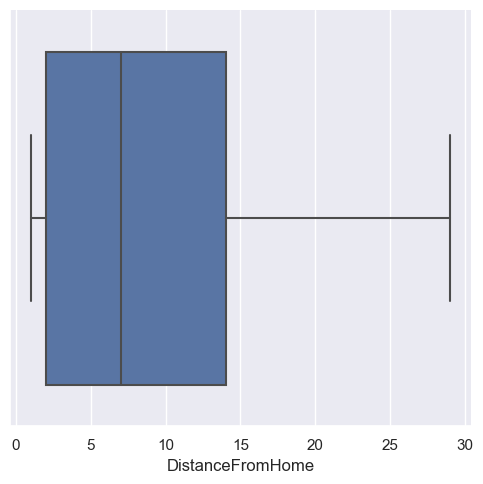

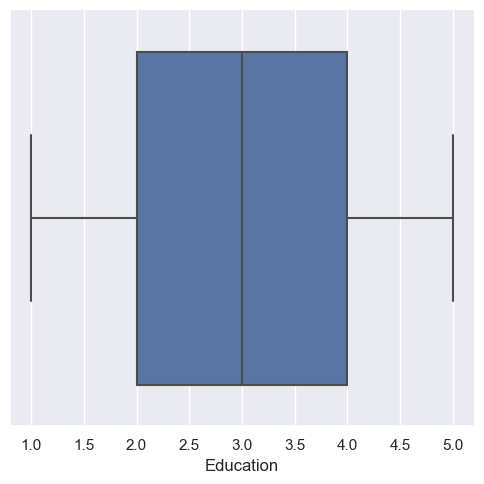

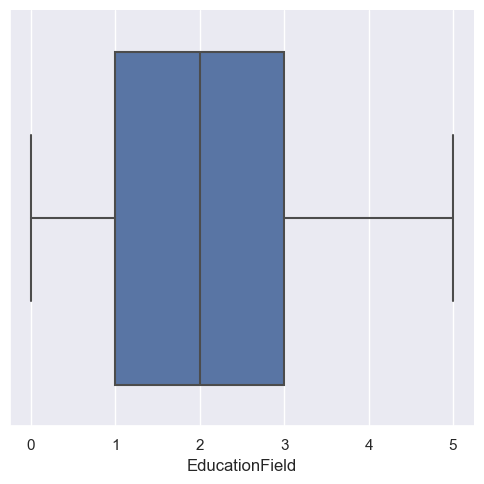

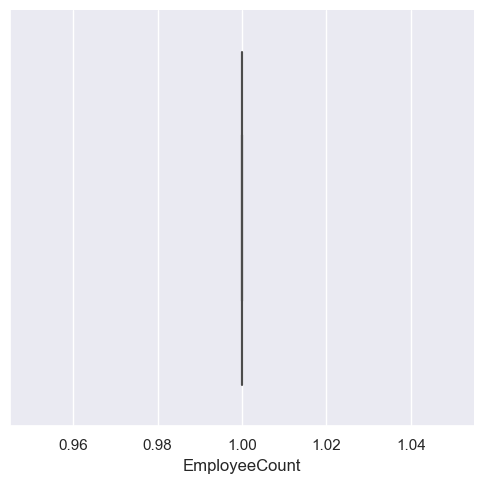

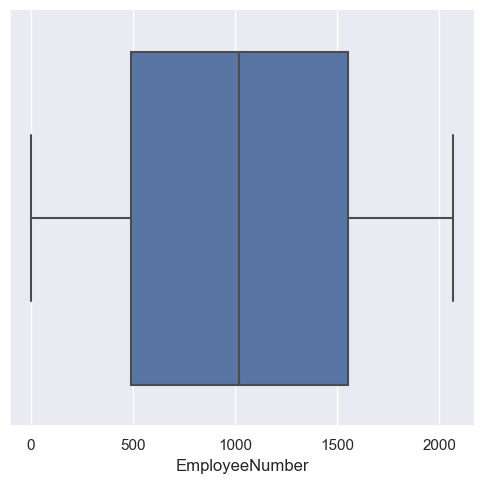

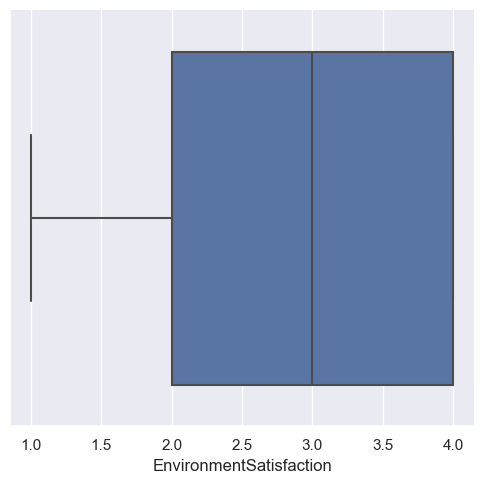

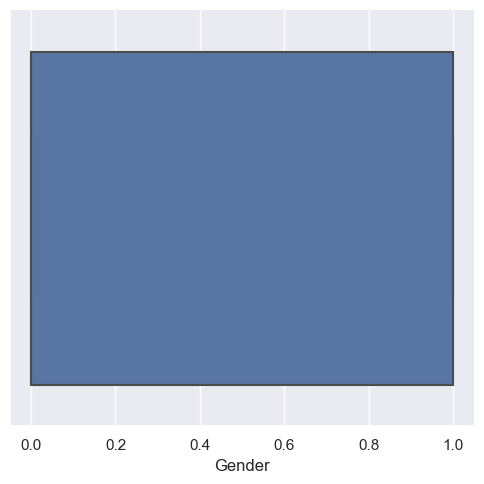

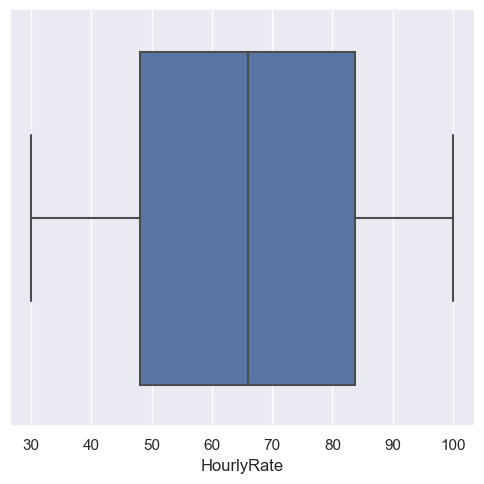

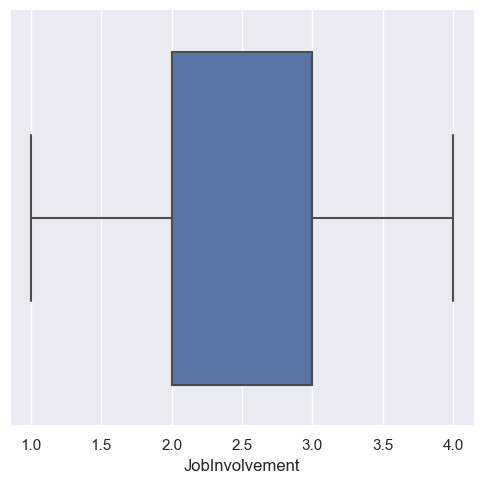

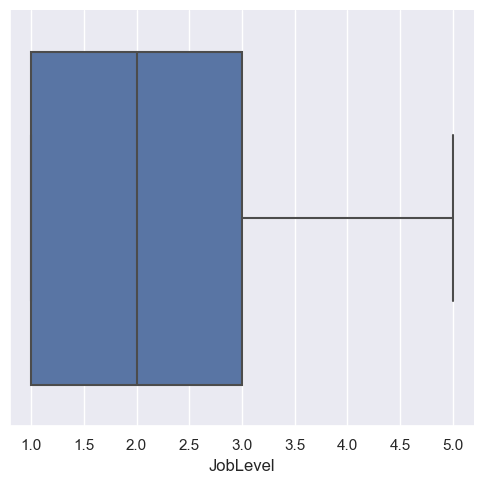

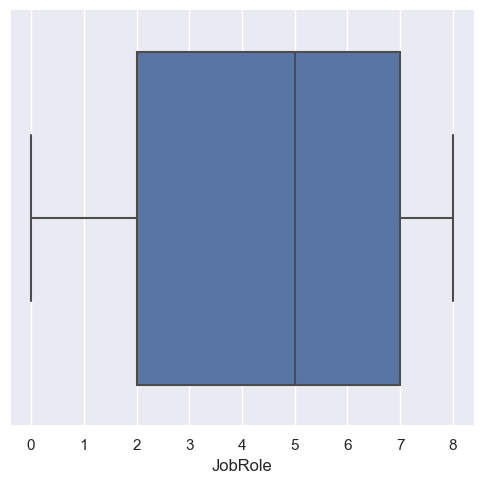

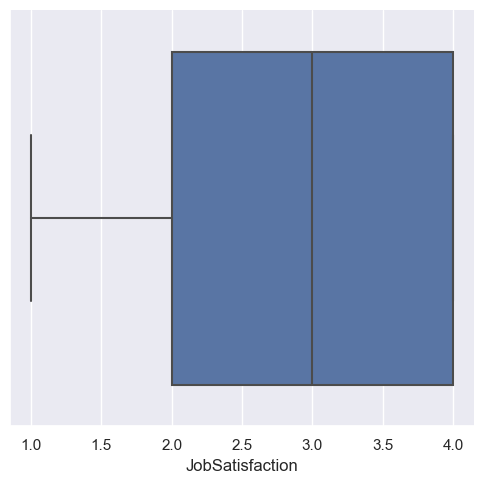

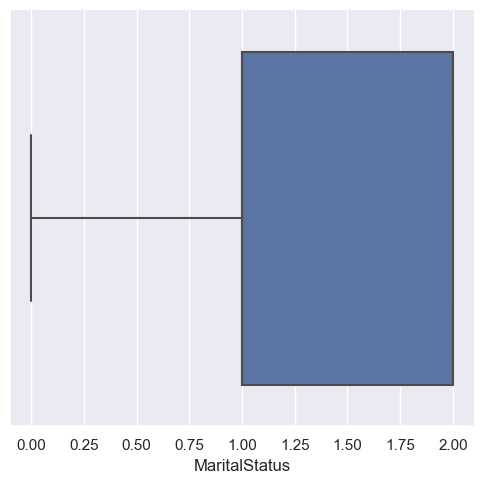

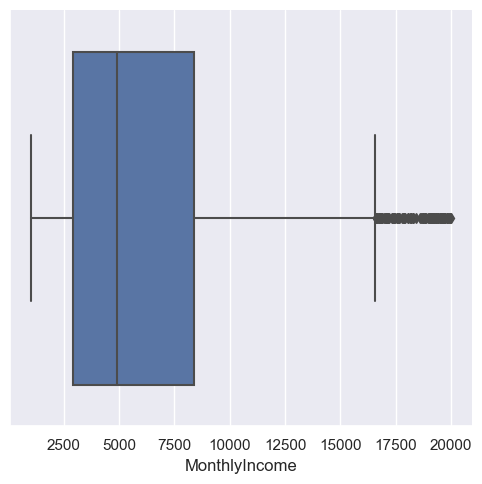

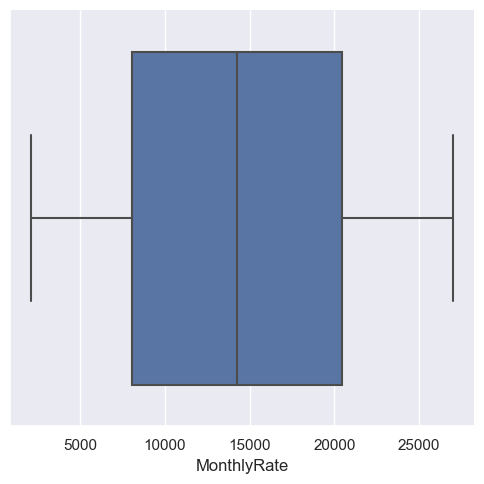

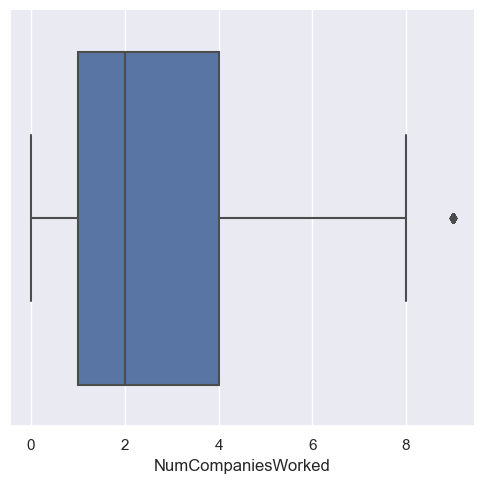

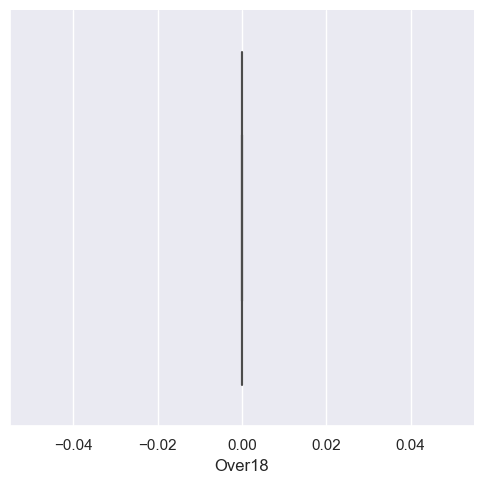

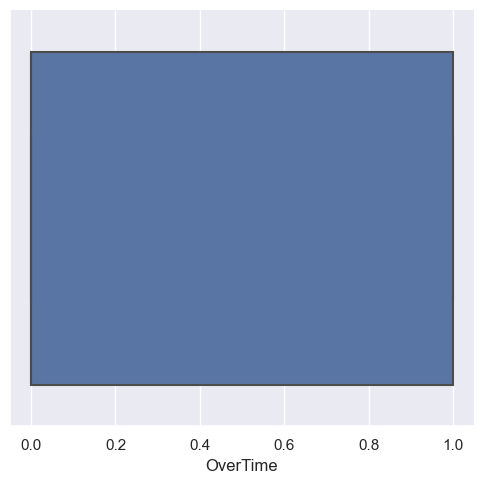

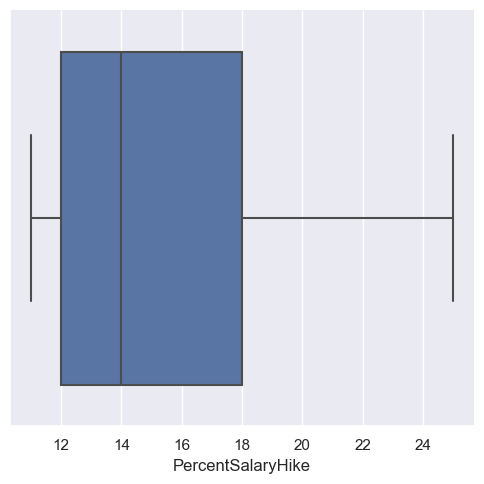

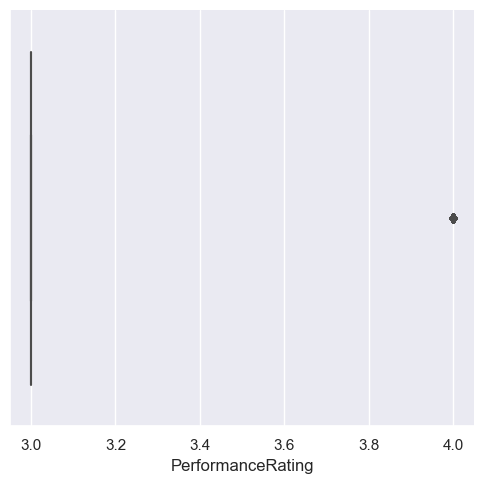

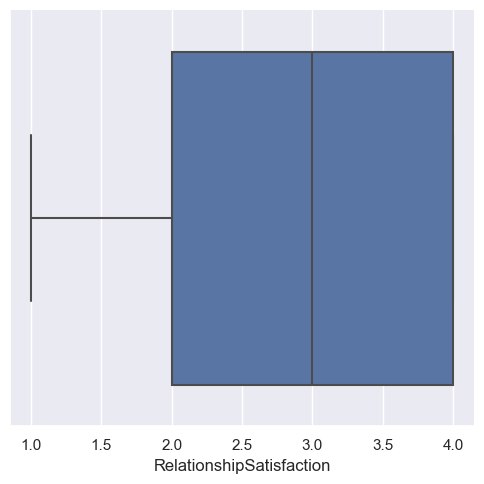

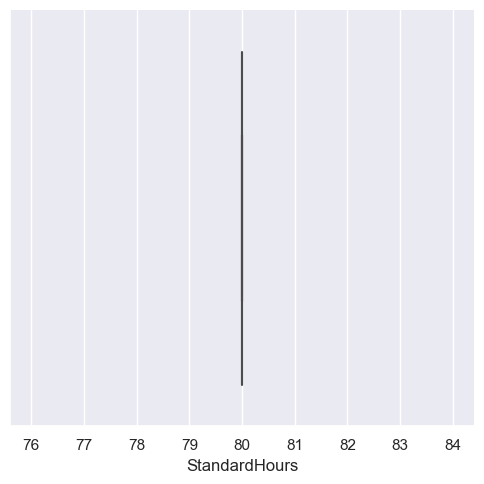

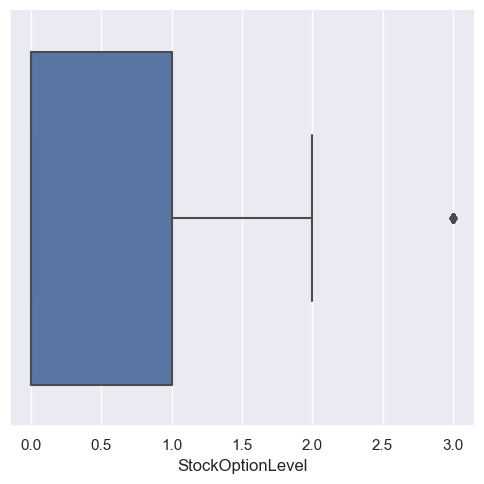

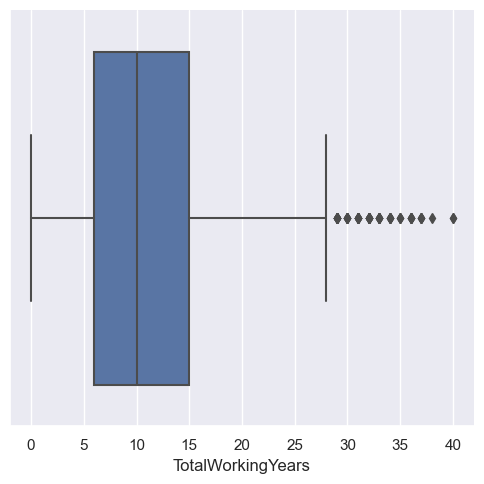

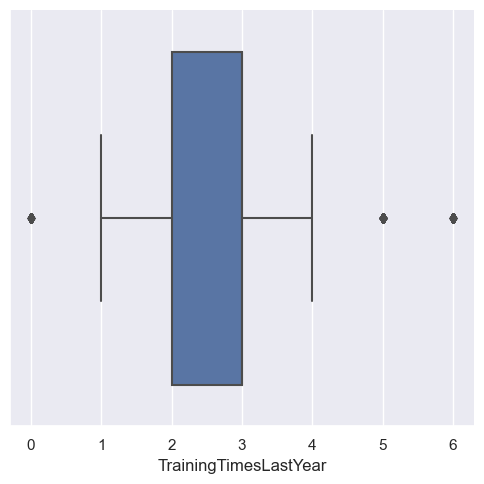

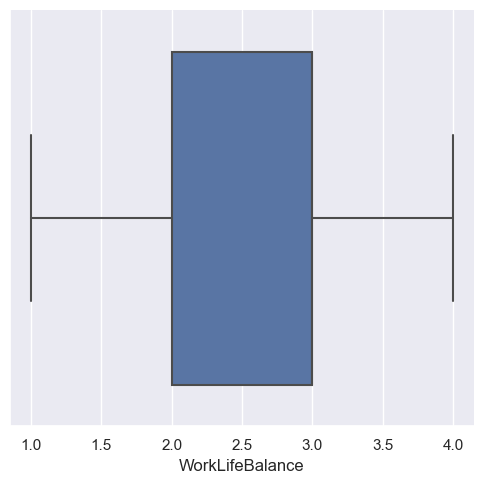

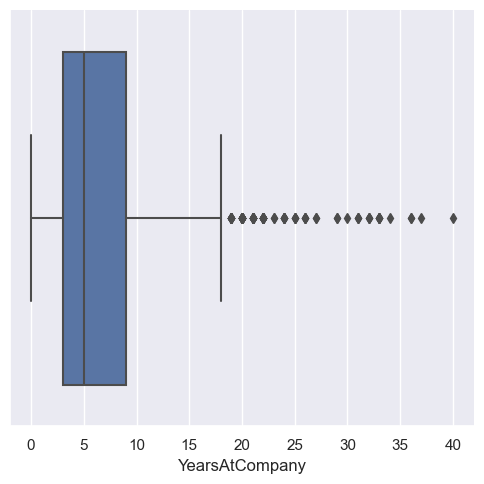

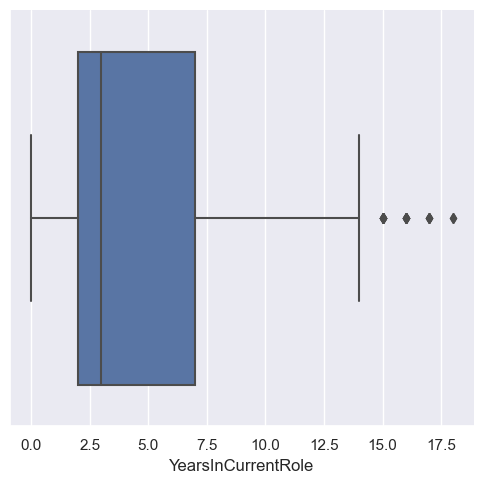

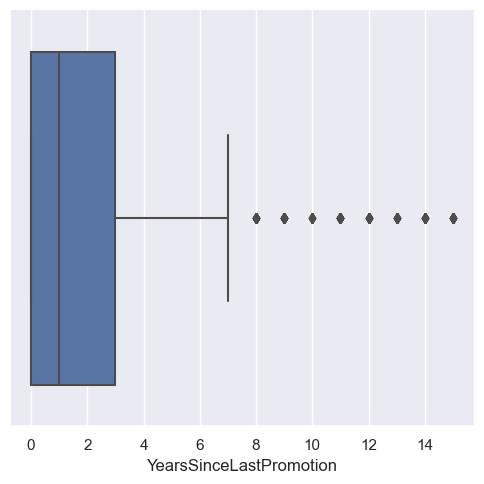

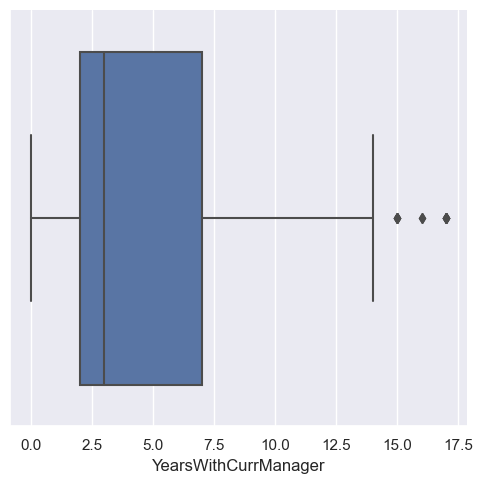

In [106]:
features=int64_lst_col
features.remove('Attrition')
for value in features:
    sns.catplot(data=df, x=value,  kind="box")

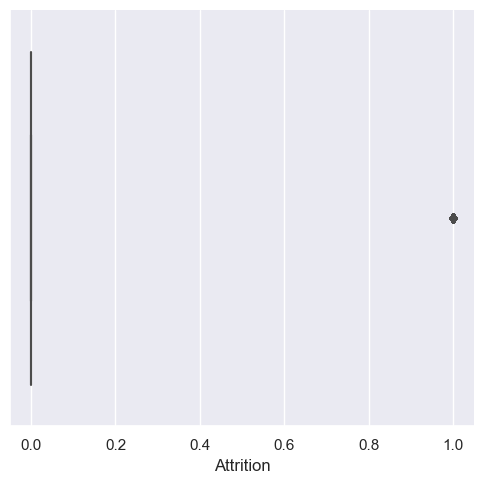

In [107]:
#for target variable
sns.catplot(data=df, x='Attrition', kind='box')

#### The dark points are known as Outliers. Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

### Boxplot Insights: - 
- Sometimes outliers may be an error in the data and should be removed. In this case these points are correct readings yet they are different from the other points that they appear to be incorrect.

- The best way to decide wether to remove them or not is to train models with and without these data points and compare their validation accuracy.

- So we will keep it unchanged as it won't affect our model.

Here, we can see that most of the variables possess outlier values. It would take us days if we start treating these outlier values one by one. Hence, for now we'll leave them as is and let our algorithm deal with them. As we know, tree-based algorithms are usually robust to outliers.

### Why Boxplot?
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.



**Attrition Prediction uses a statistical model trained on the leaving behaviour across millions of survey data points in the Peakon database. In determining the attrition risk per segment, the model also uses 5 key factors and follows this order:**

- The model calculates attrition risk per employee.
- The model then uses employee-level attrition risk to calculate the average attrition risk for each segment, as well as for the whole company.
- The model compares the average risk of each segment to the average risk of the company, to assign an attrition risk level. Example: Attrition risk in the Marketing segment is in the top 10% of your organization.

In the next step we will divide our cleaned data into training data and testing data.

# Step 2: Data Preparation
**Goal:-**

Tasks we are going to in this step:

1. Now we will spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.
2. Split dataset into train and test dataset.
3. Scaling on train dataset.

**1. Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.**

In [108]:
# Separate target and feature column in X and y variable

target = 'Attrition'

# X will be the features
X = df.drop(target,axis=1) 
#y will be the target variable
y = df[target]

y have target variable and X have all other variable.

#### Here in employee attrition prediction, Attrition is the target variable.

In [109]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   BusinessTravel            1470 non-null   int32
 2   DailyRate                 1470 non-null   int64
 3   Department                1470 non-null   int32
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int32
 7   EmployeeCount             1470 non-null   int64
 8   EmployeeNumber            1470 non-null   int64
 9   EnvironmentSatisfaction   1470 non-null   int64
 10  Gender                    1470 non-null   int32
 11  HourlyRate                1470 non-null   int64
 12  JobInvolvement            1470 non-null   int64
 13  JobLevel                  1470 non-null   int64
 14  JobRole                   1470 non-null 

In [110]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [111]:
# Check the shape of X and y variable
X.shape, y.shape

((1470, 34), (1470,))

In [112]:
# Reshape the y variable 
y = y.values.reshape(-1,1)

In [113]:
# Again check the shape of X and y variable
X.shape, y.shape

((1470, 34), (1470, 1))

#### 2. Spliting the dataset in training and testing data. 

*Here we are spliting our dataset into 80/20 percentage where 80% dataset goes into the training part and 20% goes into testing  part.*

In [114]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1176, 34), (294, 34), (1176, 1), (294, 1))

### Insights: -

Train test split technique is used to estimate the performance of machine learning algorithms which are used to make predictions on data not used to train the model.It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced.

In the next step we will train our model on the basis of our training and testing data.

# Step 3: Model Training

#### Goal:
In this step we are going to train our dataset on different classification algorithms. As we know that our target variable is in discrete format so we have to apply classification algorithm. Target variable is a category like filtering.In our dataset we have the outcome variable or Dependent variable i.e Y having only two set of values, either M (Malign) or B(Benign). So we will use Classification algorithm**

__Algorithms we are going to use in this step__

1. Logistic Regression
2. KNearest Neighbor
3. Random Forest Classification

K-fold cross validation is a procedure used to estimate the skill of the model on new data. There are common tactics that you can use to select the value of k for your dataset. There are commonly used variations on cross-validation, such as stratified and repeated, that are available in scikit-learn

In [116]:
# Define kfold with 10 split
cv = KFold(n_splits=10, shuffle=True, random_state=42)

The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

# 1. Logistic Regression

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

#### Train set cross-validation 

In [117]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression

log_R = LogisticRegression() #Object Creation

log_R.fit(X_train, y_train)

LogisticRegression()

In [118]:
#Accuracy check of trainig data

#Get R2 score
log_R.score(X_train, y_train)


0.8324829931972789

In [119]:
#Accuracy of test data
log_R.score(X_test, y_test) 

0.8673469387755102

In [120]:
# Getting kfold values
lg_scores = -1 * cross_val_score(log_R, 
                                 X_train, 
                                 y_train, 
                                 cv=cv, 
                                 scoring='neg_root_mean_squared_error')
lg_scores

array([0.40126917, 0.46940279, 0.30532006, 0.41169348, 0.36822985,
       0.44149208, 0.43362909, 0.41344912, 0.40298035, 0.42365927])

In [121]:
# Mean of the train kfold scores
lg_score_train = np.mean(lg_scores)
lg_score_train

0.4071125264493915

### Prediction 

Now we will perform prediction on the dataset using Logistic Regression.

In [122]:
# Predict the values on X_test_scaled dataset 
y_predicted = log_R.predict(X_test)

## Various parameters are calculated for analysing the predictions.

1) Confusion Matrix
2)Classification Report
3)Accuracy Score
4)Precision Score
5)Recall Score
6)F1 Score

## Confusion Matrix

A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes. It plots a table of all the predicted and actual values of a classifier.

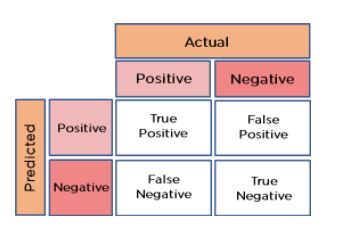

#### This diagram helps in understanding the concept of confusion matrix. 

In [123]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [124]:
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(29.75, 0.5, 'True Class')

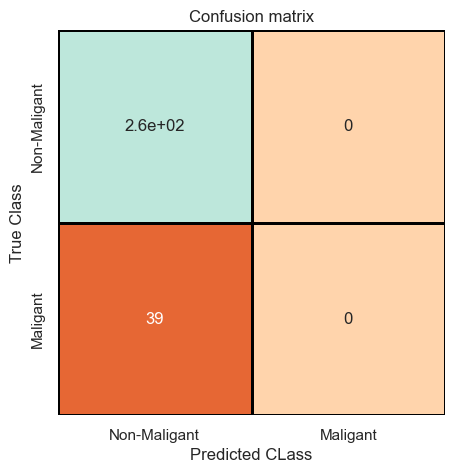

In [125]:
#We are creating Confusion Matrix on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.set(rc = {'figure.figsize':(5,5)})
sns.heatmap(cm,cmap = 'icefire_r', annot = True, cbar=False, linecolor='Black', linewidth = 2)

plt.title("Confusion matrix")
plt.xticks(np.arange(2)+.5,['Non-Maligant', 'Maligant'])
plt.yticks(np.arange(2)+.5,['Non-Maligant', 'Maligant'])
plt.xlabel('Predicted CLass')
plt.ylabel('True Class')


<AxesSubplot:>

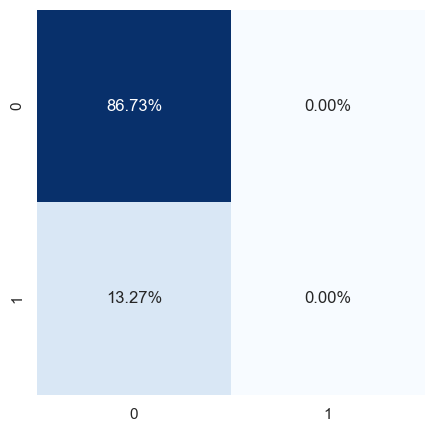

In [126]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

## Evaluating all kinds of evaluating parameters. 

#### Classification Report :
A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model. 

#### F1_score :
The F1 score is a machine learning metric that can be used in classification models. 

#### Precision_score :
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

#### Recall_score :
Recall score is used to measure the model performance in terms of measuring the count of true positives in a correct manner out of all the actual positive values. Precision-Recall score is a useful measure of success of prediction when the classes are very imbalanced.

In [127]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is Logistic Regression")
  
l_acc = accuracy_score(y_test, y_predicted)*100
print("\nThe accuracy is: {}".format(l_acc))
  
prec = precision_score(y_test, y_predicted)
print("The precision is: {}".format(prec))
  
rec = recall_score(y_test, y_predicted)
print("The recall is: {}".format(rec))
  
f1 = f1_score(y_test, y_predicted)
print("The F1-Score is: {}".format(f1))
  
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)

The model used is Logistic Regression

The accuracy is: 86.73469387755102
The precision is: 0.0
The recall is: 0.0
The F1-Score is: 0.0
Classification Report is:

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



# 2. K Nearest Neighbour

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm

In [128]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [129]:
#Accuracy check of trainig data
#Get R2 score
classifier.score(X_train, y_train)

0.8503401360544217

In [130]:
#Accuracy of test data
classifier.score(X_test, y_test) 

0.8537414965986394

In [131]:
#Get kfold values
Nn_scores = -1 * cross_val_score(classifier, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
Nn_scores


array([0.46028731, 0.50421948, 0.37956264, 0.41169348, 0.40126917,
       0.43178777, 0.44337478, 0.44337478, 0.43362909, 0.46225016])

In [132]:
# Mean of the train kfold scores
Nn_score_train = np.mean(Nn_scores)
Nn_score_train

0.43714486752111836

### Prediction

Now we will perform prediction on the dataset using K Nearest Neighbour.

In [133]:
# Predict the values on X_test_scaled dataset 
y_predicted = classifier.predict(X_test)

In [134]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [135]:
#Confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(29.75, 0.5, 'True Class')

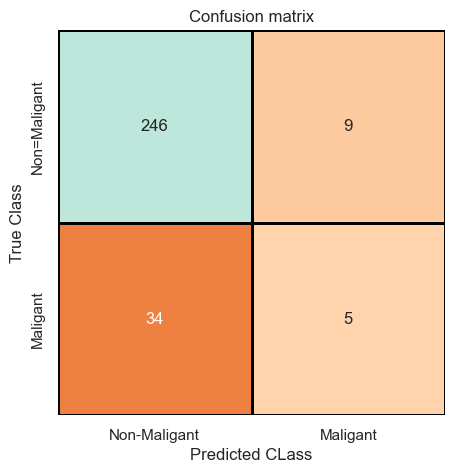

In [136]:
#We are drawing cm on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.heatmap(cm,cmap = 'icefire_r', annot = True, fmt= 'd', cbar=False, linecolor='Black', linewidth = 2)
plt.title("Confusion matrix")
plt.xticks(np.arange(2)+.5,['Non-Maligant', 'Maligant'])
plt.yticks(np.arange(2)+.5,['Non=Maligant', 'Maligant'])
plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

<AxesSubplot:>

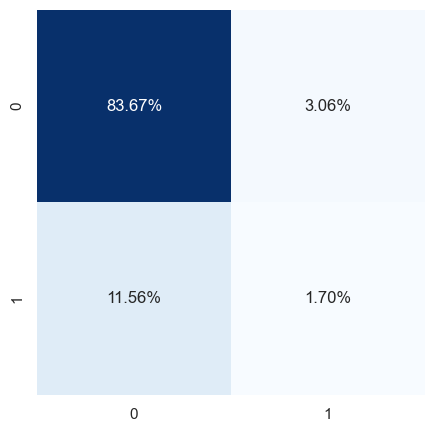

In [137]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

### Evaluating all kinds of evaluating parameters. 

In [138]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is KNeighbors Classifier")
  
k_acc = accuracy_score(y_test, y_predicted)*100
print("\nThe accuracy is: {}".format(k_acc))
  
prec = precision_score(y_test, y_predicted)
print("The precision is: {}".format(prec))
  
rec = recall_score(y_test, y_predicted)
print("The recall is: {}".format(rec))
  
f1 = f1_score(y_test, y_predicted)
print("The F1-Score is: {}".format(f1))
  
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)    

The model used is KNeighbors Classifier

The accuracy is: 85.37414965986395
The precision is: 0.35714285714285715
The recall is: 0.1282051282051282
The F1-Score is: 0.18867924528301885
Classification Report is:

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       255
           1       0.36      0.13      0.19        39

    accuracy                           0.85       294
   macro avg       0.62      0.55      0.55       294
weighted avg       0.81      0.85      0.82       294



# 3. Random Forest Classifier

Random Forest is a powerful and versatile supervised machine learning algorithm that grows and combines multiple decision trees to create a “forest.” It can be used for both classification and regression problems in R and Python.

Random Forest and Decision Tree Algorithm are considered best for the data that has outliers.

In [139]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
#clas = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clas = RandomForestClassifier()
clas.fit(X_train, y_train)


RandomForestClassifier()

In [140]:
#Accuracy check of trainig data
#Get R2 score
clas.score(X_train, y_train)

1.0

In [141]:
#Accuracy of test data
clas.score(X_test, y_test) 

0.8707482993197279

In [142]:
# Get kfold values
Dta_scores = -1 * cross_val_score(clas, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
Dta_scores


array([0.3319179 , 0.45098762, 0.3188964 , 0.36822985, 0.37956264,
       0.37956264, 0.41344912, 0.39223227, 0.39223227, 0.35805744])

In [143]:
# Mean of the train kfold scores
Dta_score_train = np.mean(Dta_scores)
Dta_score_train

0.378512813484627

### Prediction 

Now we will perform prediction on the dataset using Random Forest Classifier.

In [144]:
# predict the values on X_test_scaled dataset 
y_predicted = clas.predict(X_test)

In [145]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [146]:
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(29.75, 0.5, 'True Class')

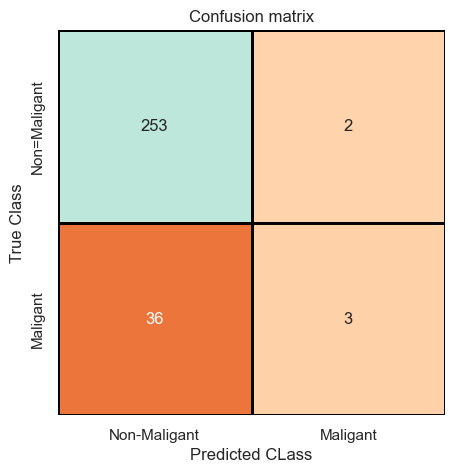

In [147]:
#We are drawing cm on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.heatmap(cm,cmap = 'icefire_r', annot = True, fmt= 'd', cbar=False, linecolor='Black', linewidth = 2)
plt.title("Confusion matrix")
plt.xticks(np.arange(2)+.5,['Non-Maligant', 'Maligant'])
plt.yticks(np.arange(2)+.5,['Non=Maligant', 'Maligant'])
plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

<AxesSubplot:>

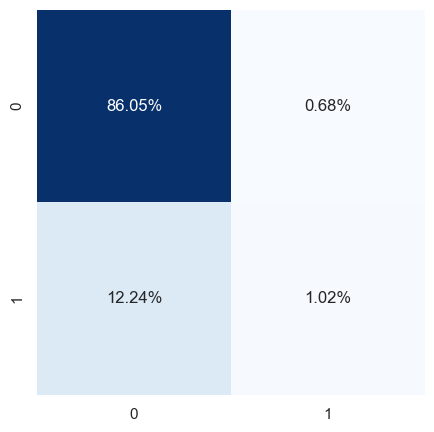

In [148]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

### Evaluating all kinds of evaluating parameters. 

In [149]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is Random Forest Classifier")
  
r_acc = accuracy_score(y_test, y_predicted)*100
print("\nThe accuracy is {}".format(r_acc))
  
prec = precision_score(y_test, y_predicted)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, y_predicted)
print("The recall is {}".format(rec))
  
f1 = f1_score(y_test, y_predicted)
print("The F1-Score is {}".format(f1))
 
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)  

The model used is Random Forest Classifier

The accuracy is 87.07482993197279
The precision is 0.6
The recall is 0.07692307692307693
The F1-Score is 0.13636363636363635
Classification Report is:

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.60      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.74      0.53      0.53       294
weighted avg       0.84      0.87      0.82       294



# Insight: -

In [150]:
cal_metric=pd.DataFrame([l_acc,k_acc,r_acc],columns=["Score in percentage"])
cal_metric.index=['Logistic Regression',
                  'K-nearest Neighbours',
                  'Random Forest']
cal_metric

,Score in percentage
Logistic Regression,86.734694
K-nearest Neighbours,85.374150
Random Forest,87.074830



- As you can see with our Random Forest Model(0.8707 or 87.07%)
- So we gonna save our model with Random Forest Algorithm

# Step 4: Save Model
**Goal:- In this step we are going to save our model in pickel format file.**

In [151]:
import pickle
pickle.dump(clas , open('Employee_Attrition_lo.pkl', 'wb'))
pickle.dump(clas , open('Employee_Attrition_kn.pkl', 'wb'))
pickle.dump(clas , open('Employee_Attrition_ra.pkl', 'wb'))

In [152]:
import pickle

def model_prediction(features):
    
    pickled_model = pickle.load(open('Employee_Attrition_ra.pkl', 'rb'))
    TravelInsurance = str(pickled_model.predict(features)[0])
    if TravelInsurance=='1':
        TravelInsurance='Yes'
    else:
        TravelInsurance='No'
    
    return str(f'The Employee Attrition is {TravelInsurance}')

#### We can test our model by giving our own parameters or features to predict. 

In [162]:
Age = 28
BusinessTravel = 2
DailyRate = 866
Department = 2
DistanceFromHome = 5
Education = 3
EducationField = 3
EmployeeCount = 1
EmployeeNumber = 1469
EnvironmentSatisfaction = 4
Gender = 1
HourlyRate = 84
JobInvolvement = 3
JobLevel = 2
JobRole = 7
JobSatisfaction = 1
MaritalStatus = 2
MonthlyIncome = 8463
MonthlyRate = 23490
NumCompaniesWorked = 0
Over18 = 0
OverTime = 0
PercentSalaryHike = 18
PerformanceRating = 3
RelationshipSatisfaction = 4
StandardHours = 80
StockOptionLevel = 0
TotalWorkingYears = 6
TrainingTimesLastYear = 4
WorkLifeBalance = 3
YearsAtCompany = 5
YearsInCurrentRole = 4
YearsSinceLastPromotion = 1
YearsWithCurrManager = 3

In [163]:
model_prediction([[Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager]])

'The Employee Attrition is No'

1 = Yes, 0 = No

# Step 5: After making model and checking its accuracy, we are going to deploy it in API/ Web App. 

This step holds a great importance as in this step we make a Web API which integrates our model and let it interacts with user.
The user simply put data he is asked to fill and our API will help in predicting.

### There are many methods to create Web Application like Flask, Streamlit, etc. We going to use streamlit to create API. Below is an API refrence. 

https://tinyurl.com/bdexnk6v

# Conclusion

After observing the problem statement we have build an efficient model to the electricity price. The above model helps in predicting about employee attrition. The accuracy for the prediction is 87.07%.